Cлушателя курса "Data Science" Образовательного центра Московского государственного технического университета им. Н.Э. Баумана

In [1]:
# Версия
from platform import python_version
print(python_version())


3.9.13


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, RidgeCV, ElasticNetCV
from sklearn import preprocessing
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam

In [4]:
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
from pandas import read_excel, DataFrame, Series
import warnings
warnings.filterwarnings("ignore")

Загружаем первый датасет и посмотрим на названия столбцов

In [5]:
df_bp = pd.read_excel(r"C:\Users\Александр\Desktop\вкр\X_bp.xlsx")
df_bp.shape

(1023, 11)

In [6]:
# Удаляем первый неинформативный столбец
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
# Посмотрим на первые 5 строк первого датасета, первый столбец удалился
df_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [7]:
# Проверим размерность первого файла
df_bp.shape

(1023, 10)

In [8]:
# Загружаем второй датасет (углепластик) 
df_nup = pd.read_excel(r"C:\Users\Александр\Desktop\вкр\X_nup.xlsx")
df_nup.shape

(1040, 4)

In [9]:
# Удаляем первый неинформативный столбец
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
# Посмотрим на первые 5 строк второго датасета и убедимся, что и здесь не нужный первый столбец успешно удалился
df_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [10]:
# Проверим размерность второго файла
df_nup.shape

(1040, 3)

In [11]:

# Но наша задача собрать исходные данные файлы в один, единый набор данных. 
# По условию задачи объединяем их по типу INNER. 
df = df_bp.join(df_nup, how='inner') #объединяем
df.shape

(1023, 13)

In [12]:
# Посмотрим на начальные и конечные строки нашего датасета на данном этапе работы
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [13]:
# Просмотрим информацию о датасете
df.info()
# Только "Угол нашивки, град" имеет тип int64(целочисленные значения), все остальные признаки float64(числа с плавающей точкой).
# Датасет не нуждается в преобразовании типов значений


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [14]:
# Изучим описательную статистику наших данных (максимальное, минимальное, квартили, медиана, стандартное отклонение, среднее значение и т.д.), посмотрим на основные параметры анализа данных
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [15]:
a = df.describe()
a.T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [16]:
# Пропуски данных

In [17]:
# Проверим на пропущенные данные
df.isnull().sum()
# Пропущенных данных нет = нулевых значений нет, очистка не требуется

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:>

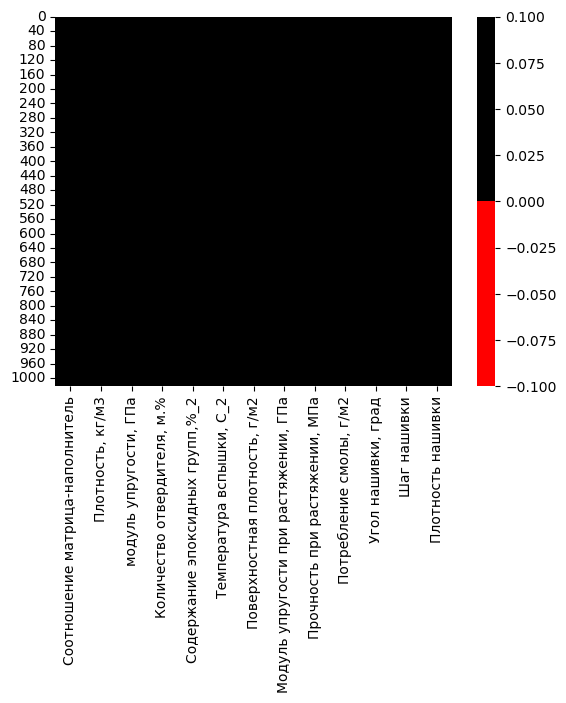

In [18]:
# красный - пропущенные данные, черный - не пропущенные
cols = df.columns
colours = ['#ff0000','#000000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
# Тепловая карта показывает наличие пропусков

In [19]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки, град - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


In [20]:
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [21]:
# Создадим переменную для названия всех столбцов. Это нам пригодится при построении моделей. И перейдем к визуализации данных
df.columns
# column_names = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
# "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
# "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
# "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
column_names = df.columns

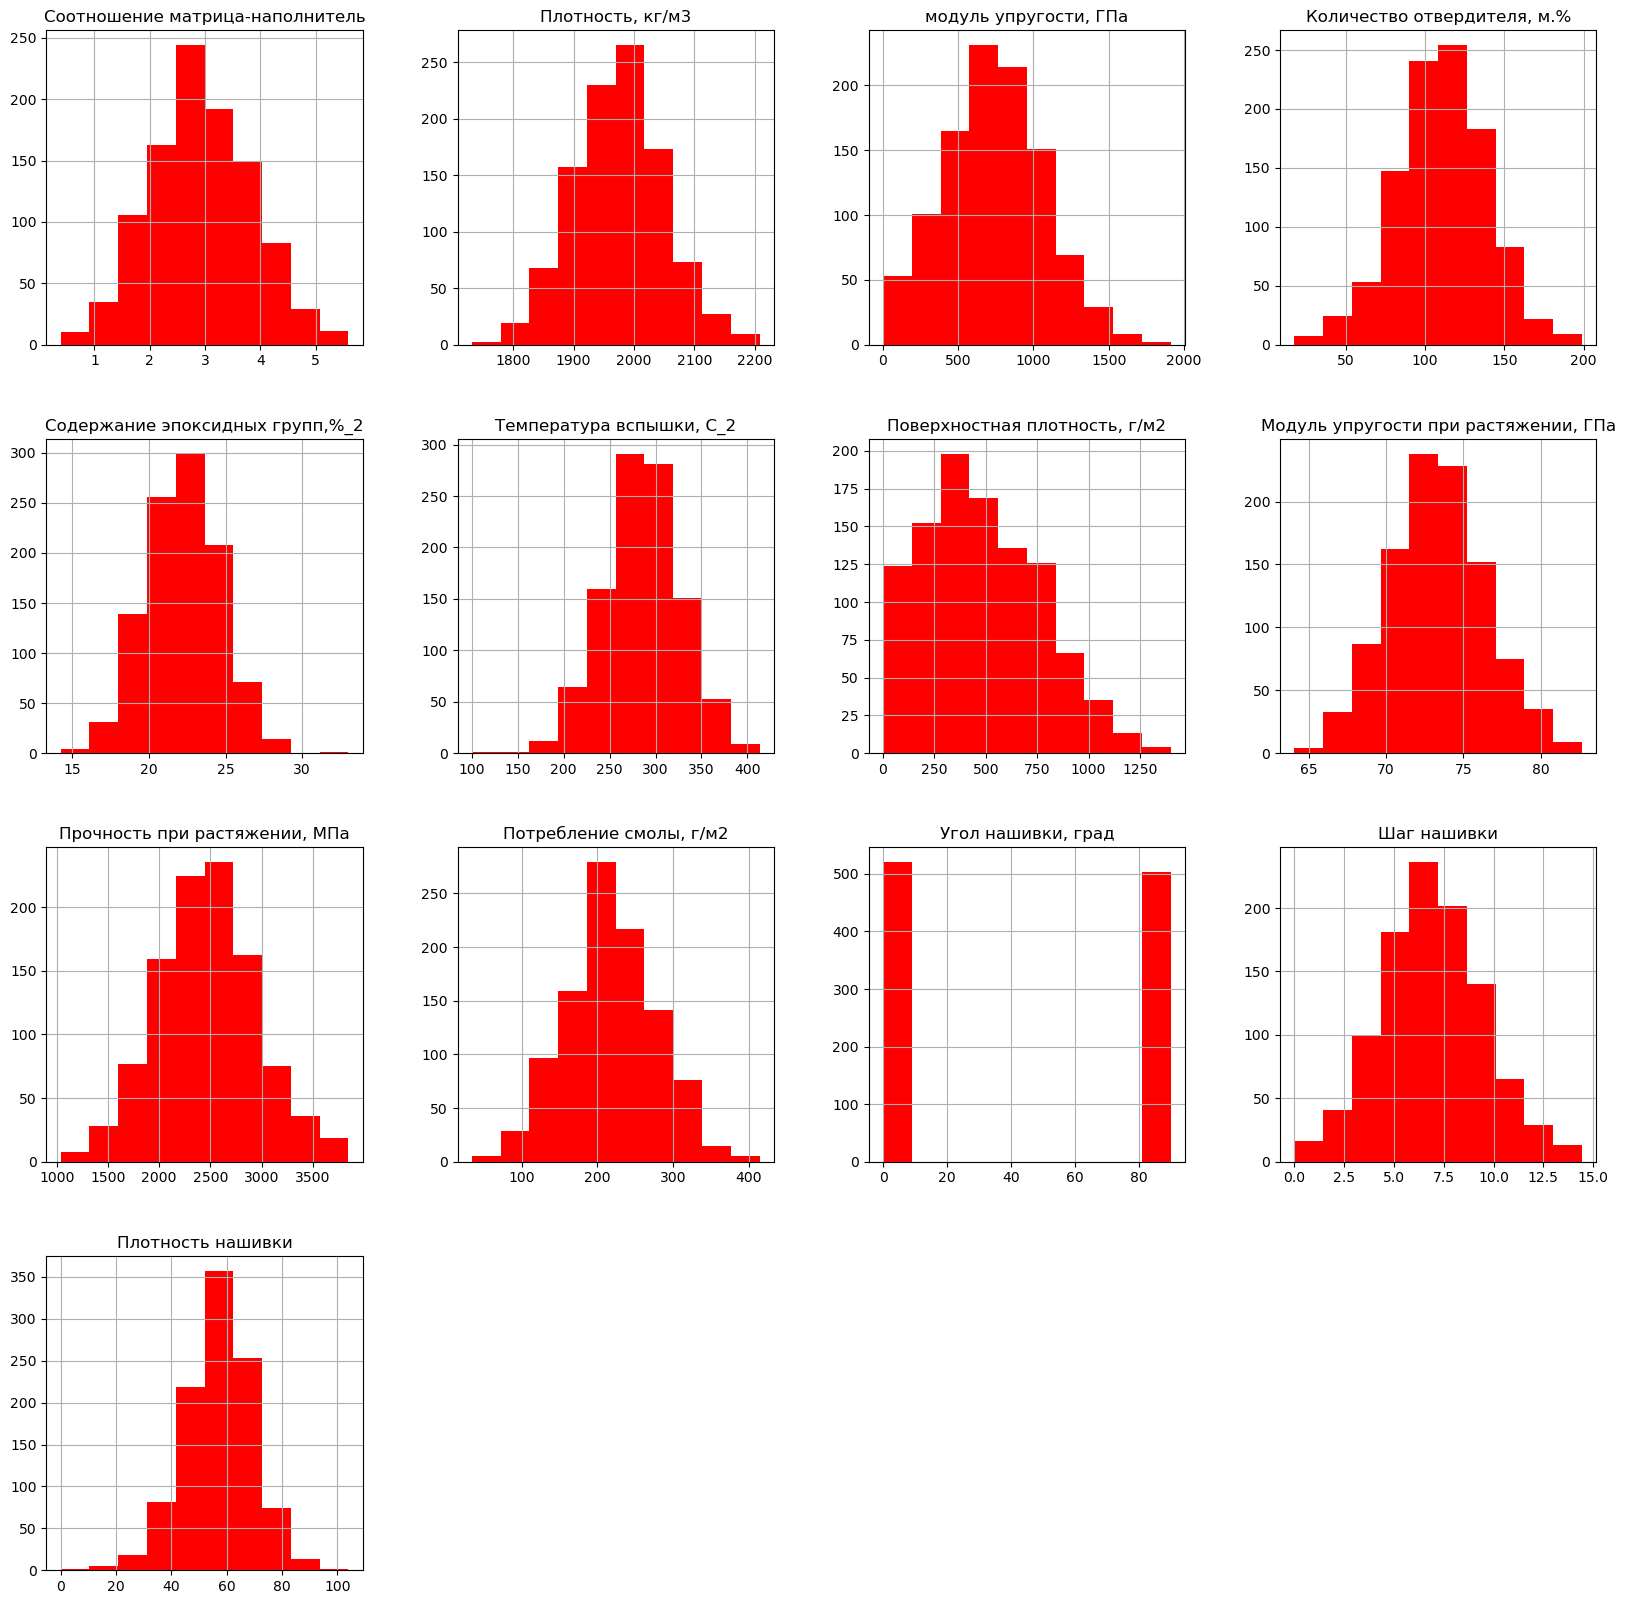

In [22]:
# Построим гистограммы распределения каждой из переменных без нормализации и исключения шумов
df.hist(figsize = (20,20), color = "r")
plt.show()

Соотношение матрица-наполнитель


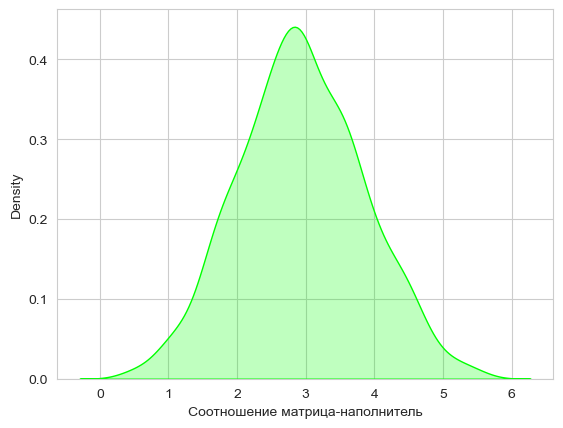

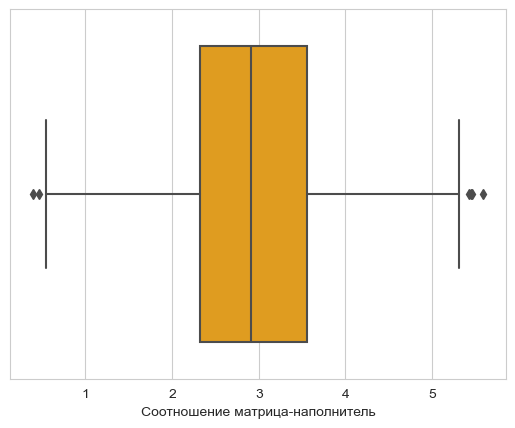

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325506
Медианное значение:  2.90687765033521



Плотность, кг/м3


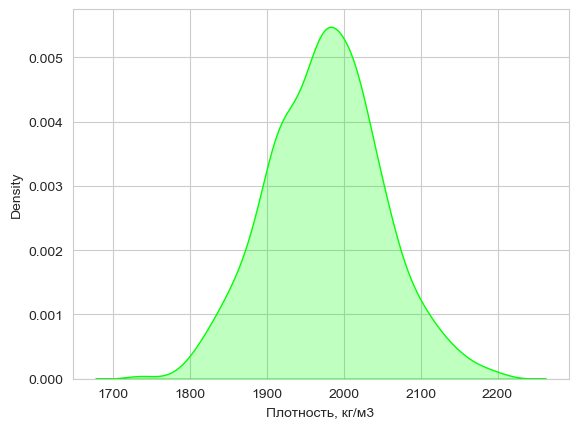

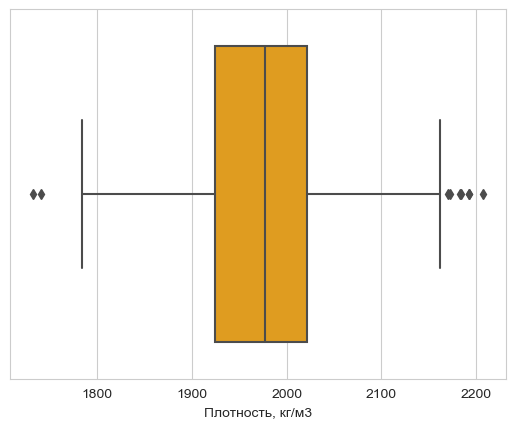

Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101548
Медианное значение:  1977.62165679058



модуль упругости, ГПа


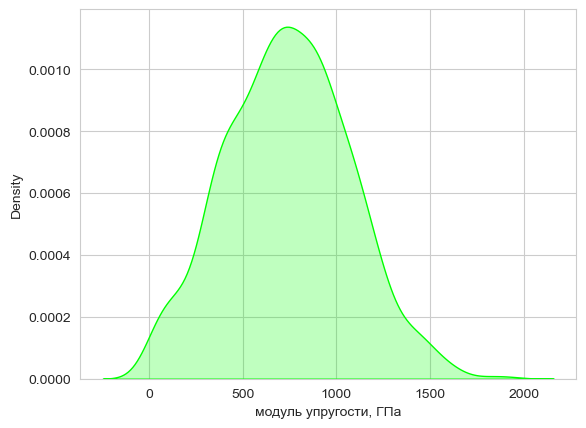

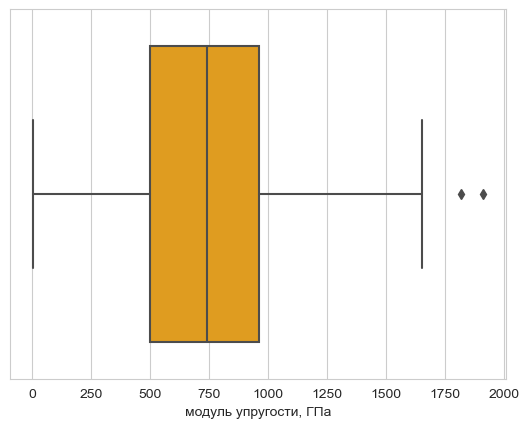

Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560719
Медианное значение:  739.664327697792



Количество отвердителя, м.%


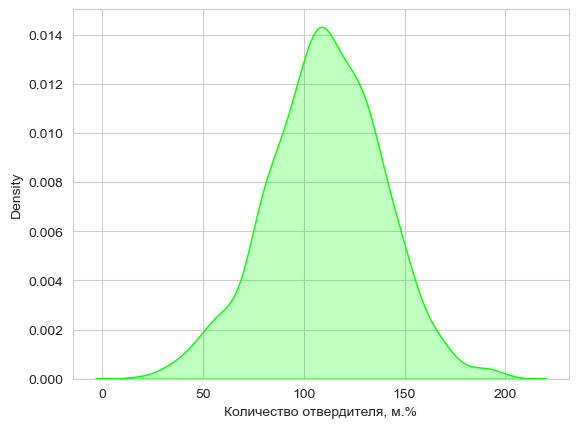

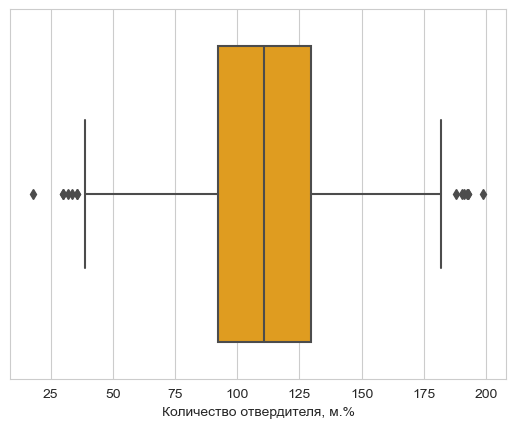

Минимальное значение:  17.7402745562519
Максимальное значение:  198.953207190451
Среднее значение:  110.57076864736258
Медианное значение:  110.564839894065



Содержание эпоксидных групп,%_2


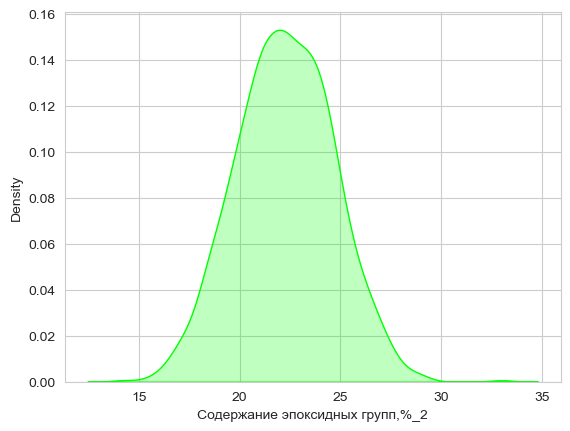

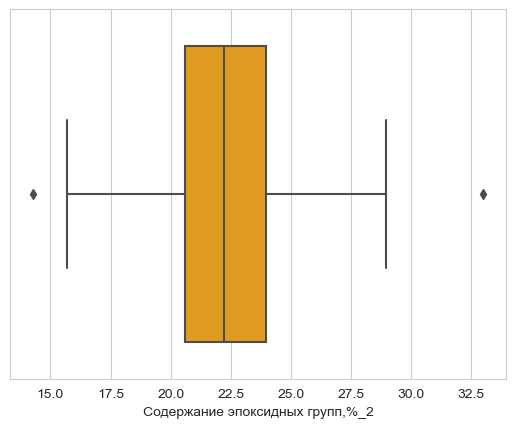

Минимальное значение:  14.2549854977161
Максимальное значение:  33.0
Среднее значение:  22.24438954776772
Медианное значение:  22.2307437560244



Температура вспышки, С_2


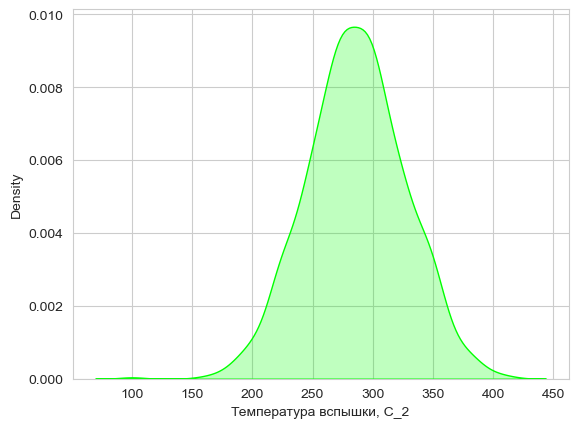

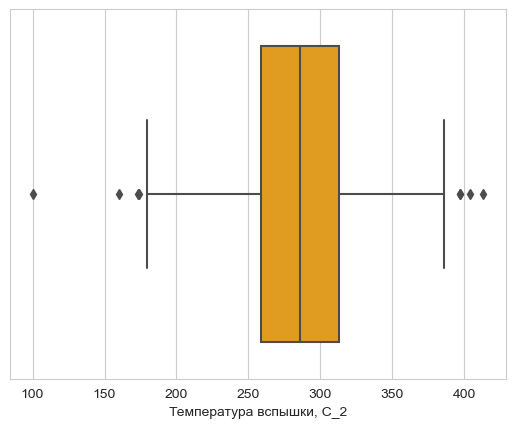

Минимальное значение:  100.0
Максимальное значение:  413.273418243566
Среднее значение:  285.88215135162227
Медианное значение:  285.896812331237



Поверхностная плотность, г/м2


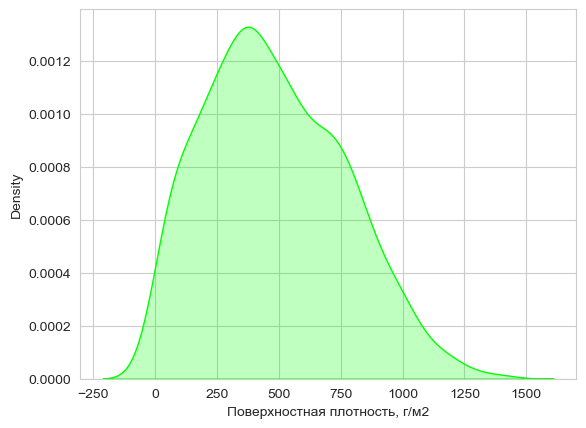

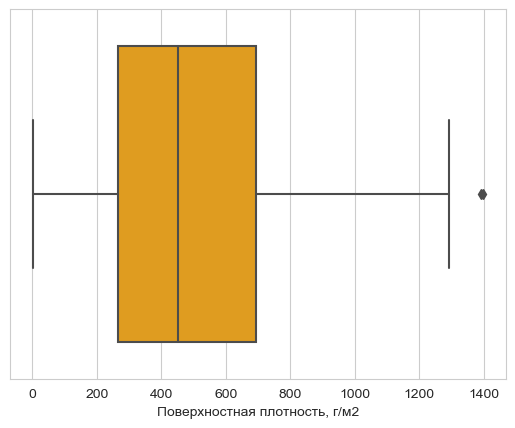

Минимальное значение:  0.603739925153945
Максимальное значение:  1399.54236233989
Среднее значение:  482.7318330384181
Медианное значение:  451.86436518306



Модуль упругости при растяжении, ГПа


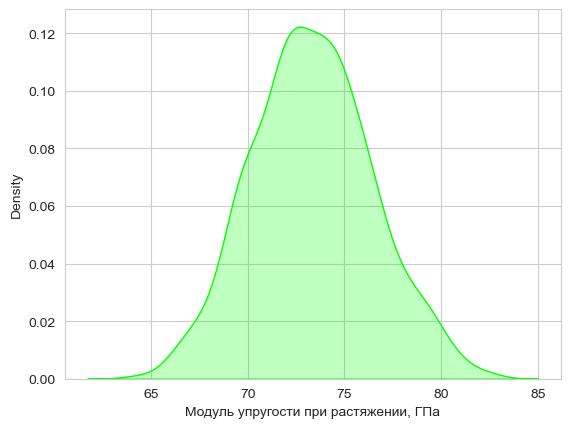

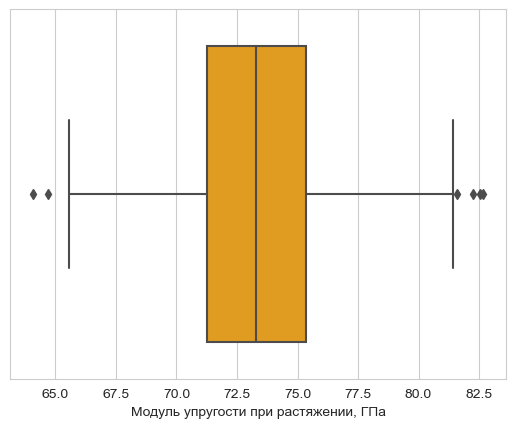

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.32857125009073
Медианное значение:  73.2688045943481



Прочность при растяжении, МПа


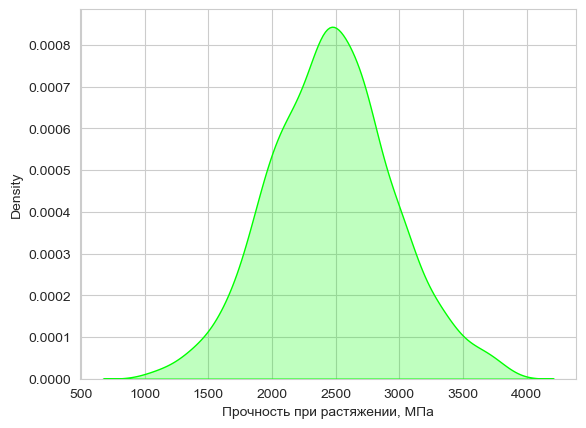

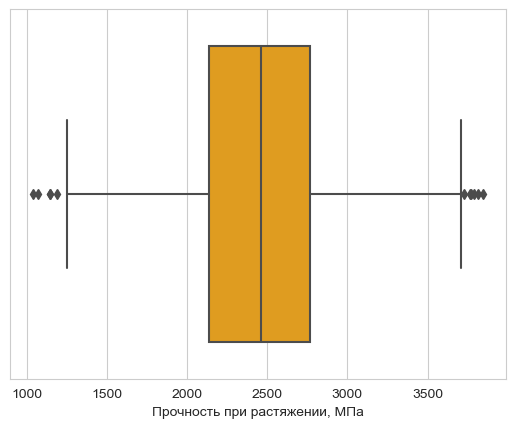

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2466.9228426979025
Медианное значение:  2459.52452600309



Потребление смолы, г/м2


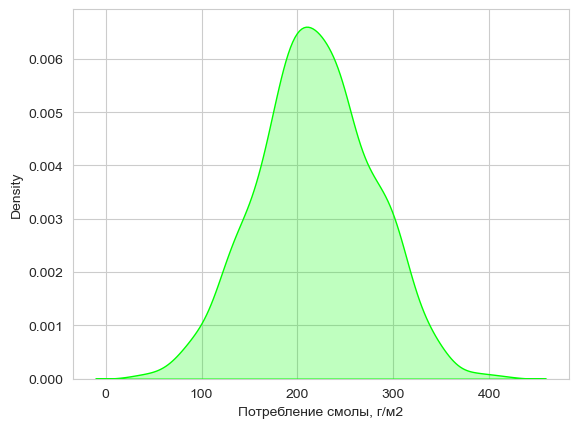

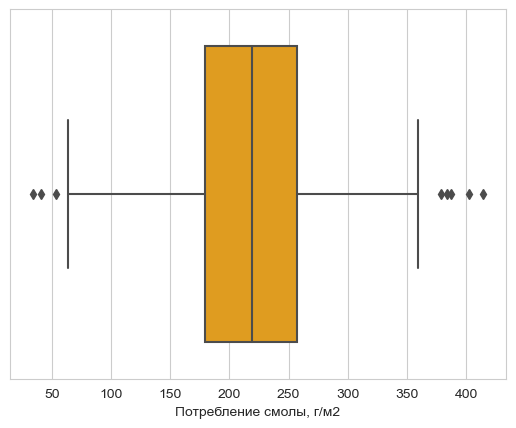

Минимальное значение:  33.8030255329625
Максимальное значение:  414.590628361534
Среднее значение:  218.42314367654265
Медианное значение:  219.198882195134



Угол нашивки, град


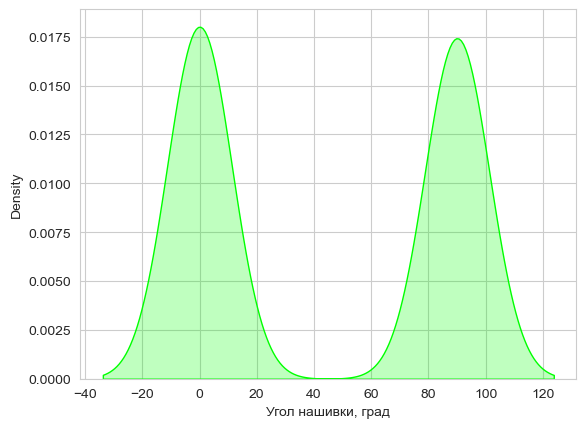

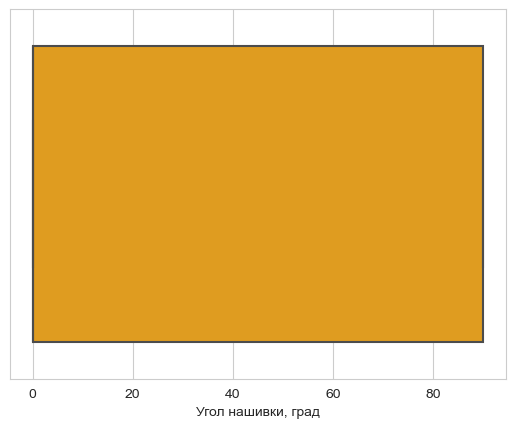

Минимальное значение:  0
Максимальное значение:  90
Среднее значение:  44.252199413489734
Медианное значение:  0.0



Шаг нашивки


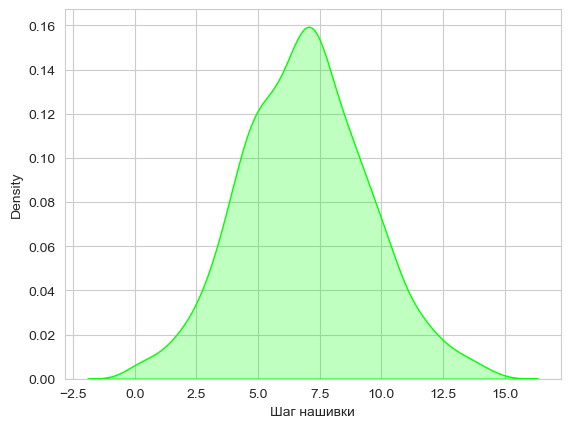

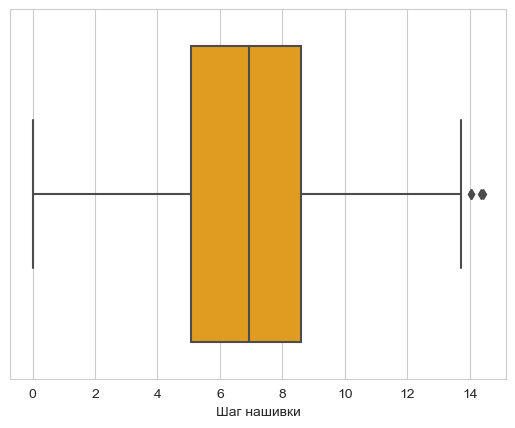

Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.899222077675024
Медианное значение:  6.9161438559491



Плотность нашивки


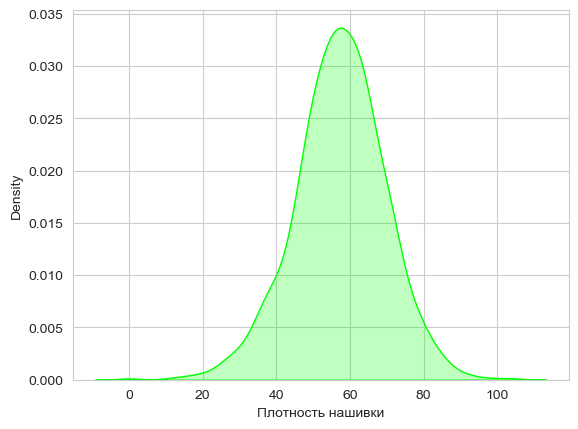

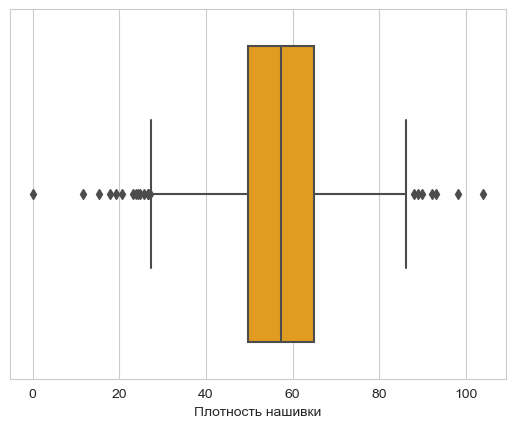

Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.15392943285763
Медианное значение:  57.3419198469929





In [23]:
for column_name in column_names:
    print(column_name)
    gis = df[column_name]
    sns.set_style("whitegrid")
    sns.kdeplot(data = gis, shade = True, palette ='colorblind', color = "lime")
    plt.show()
    
    sns.boxplot(x=gis, color = "orange");
    plt.show()
    
    print("Минимальное значение: ", end = " ")
    print(np.min(gis))
    print("Максимальное значение: ", end=" ")
    print(np.max(gis))
    print("Среднее значение: ", end = " ")
    print(np.mean(gis))
    print("Медианное значение: ", end = " ")
    print(np.median(gis))
    print("\n\n")

KeyError: 'Угол нашивки'

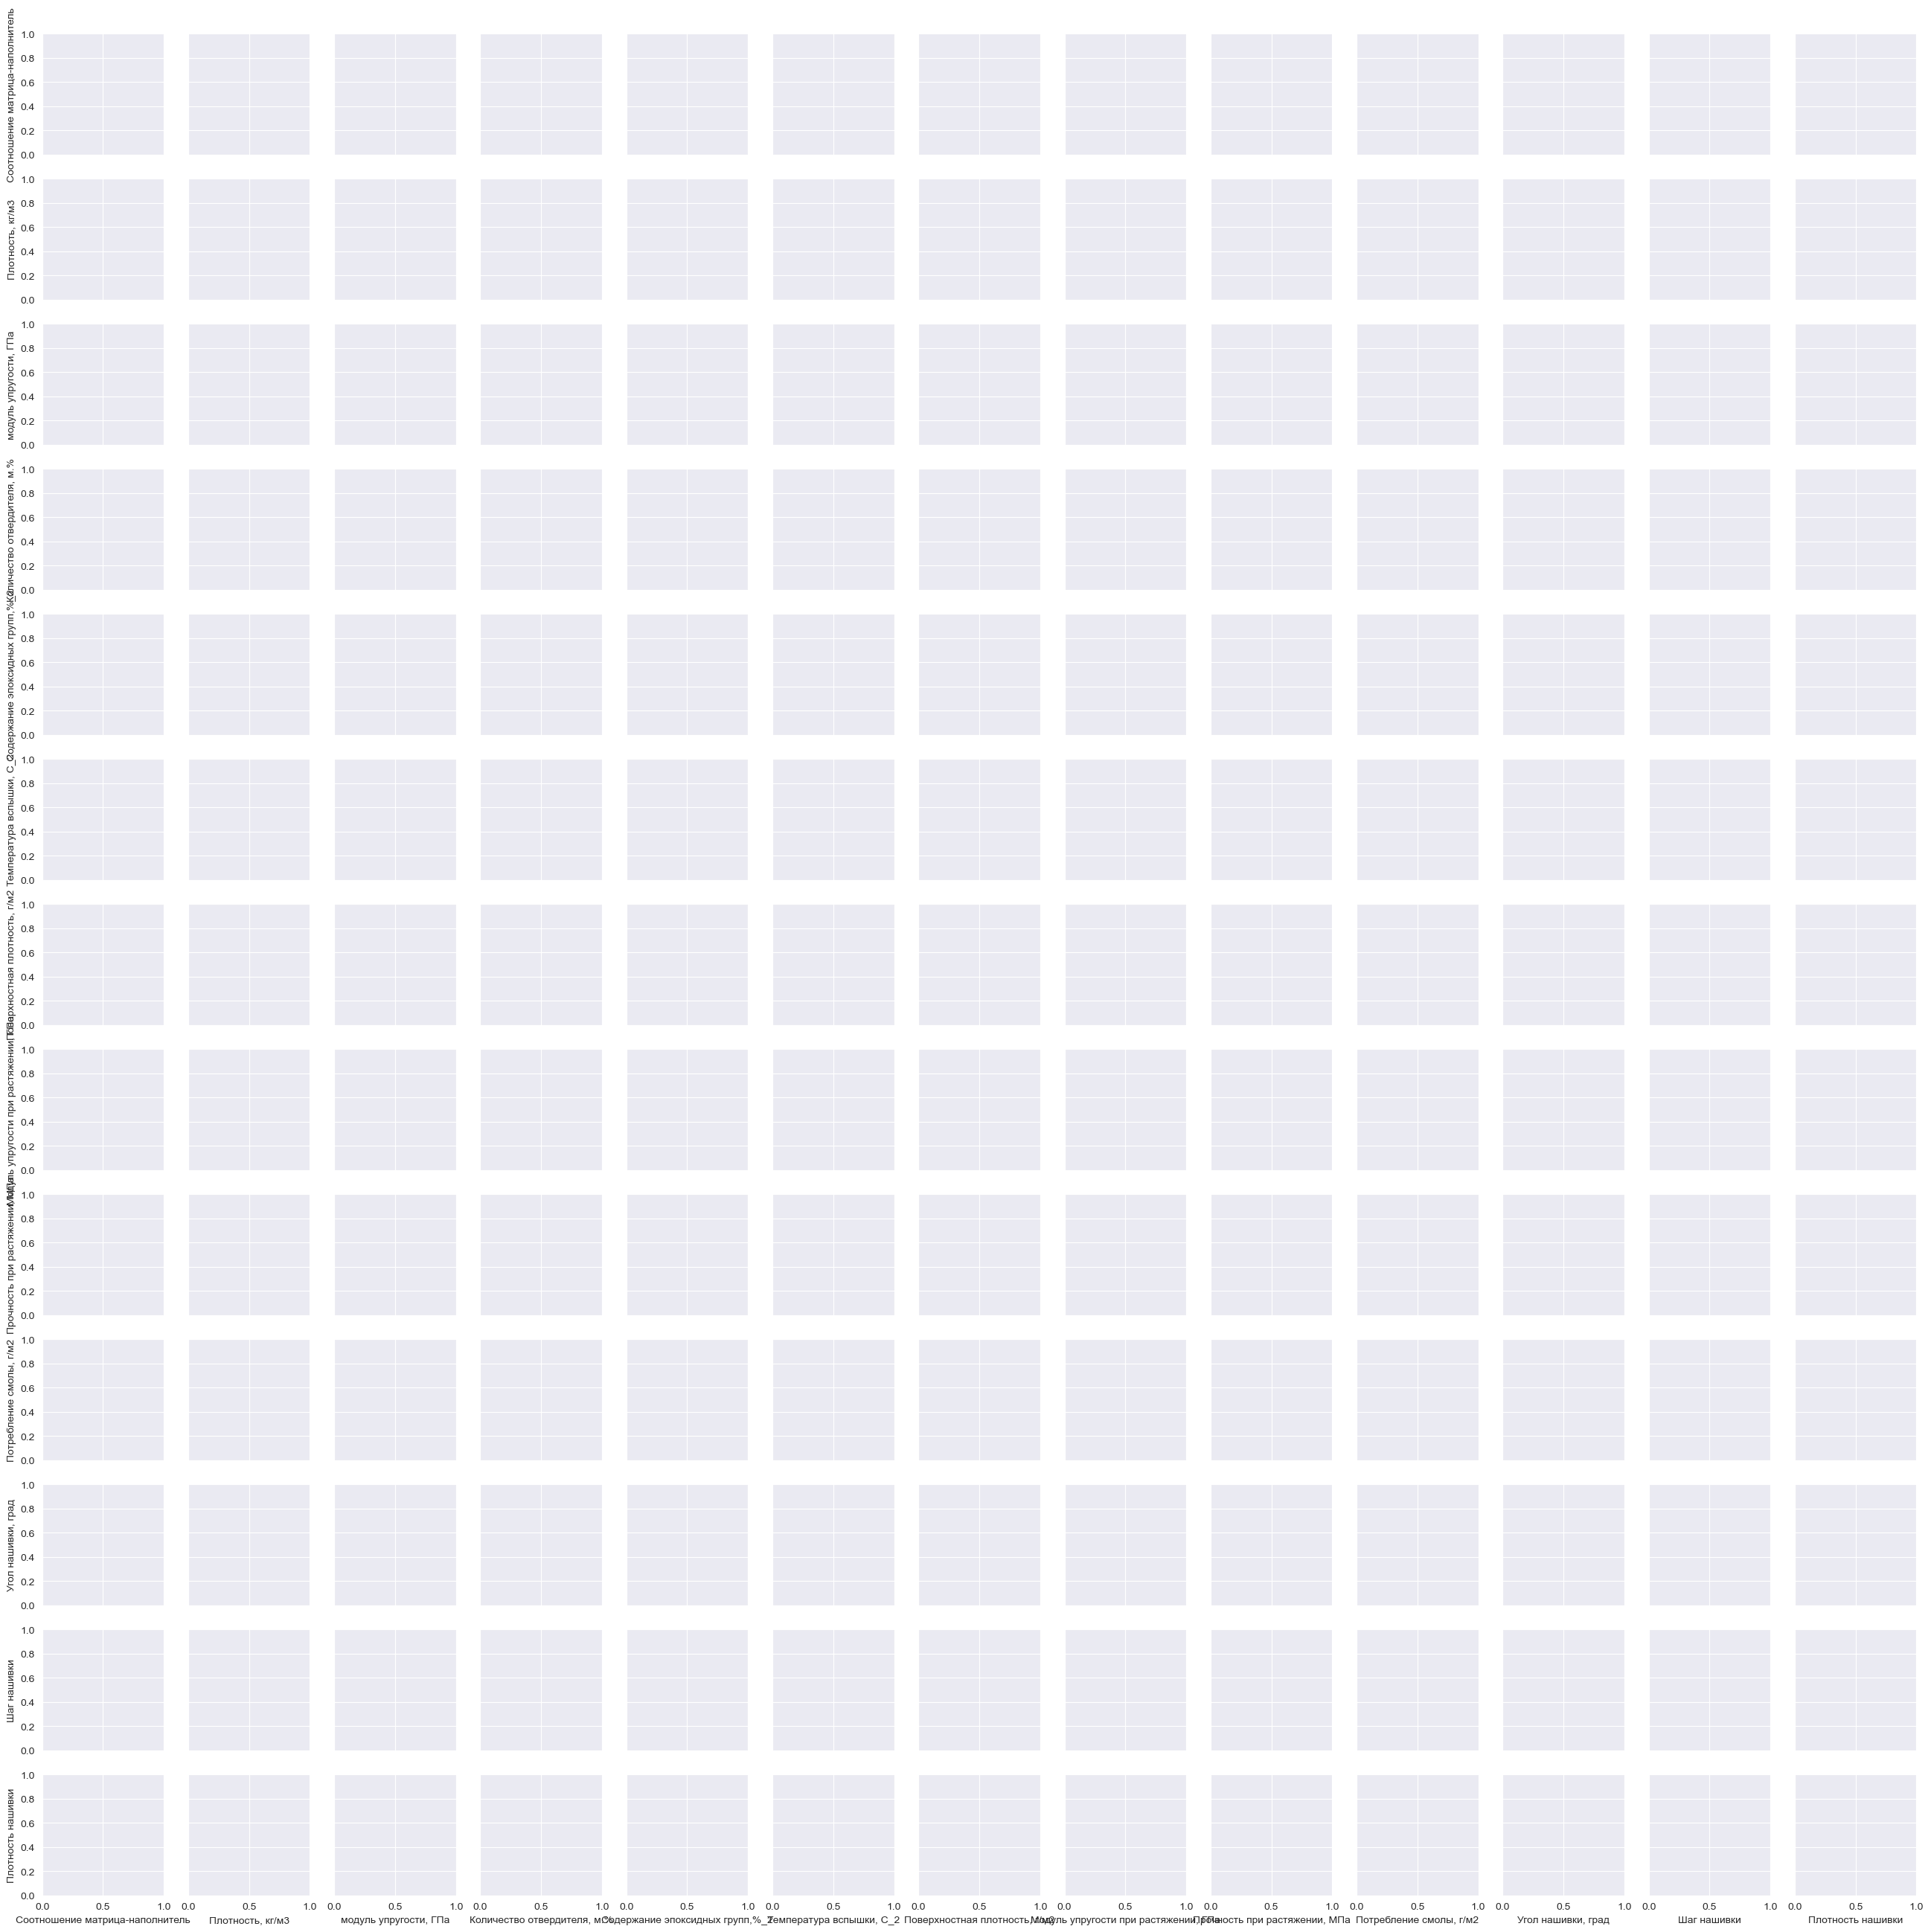

In [24]:
# Попарные графики рассеяния точек (матрица диаграмм рассеяния) (первый вариант)
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette='tab10')
# Попарные графики рассеяния точек так же не показывают какой-либо зависимости между данными.
# Зависимость между показателями не линейная, взаимосвязь отсутствует, необходимо использовать несколько показателей. 
# из графиков можно наблюдать выбросы, потому что некоторые точки располагаются далеко от общего облака
# Отсутствие линейной корреляции наверняка подтвердится при построении регрессии?

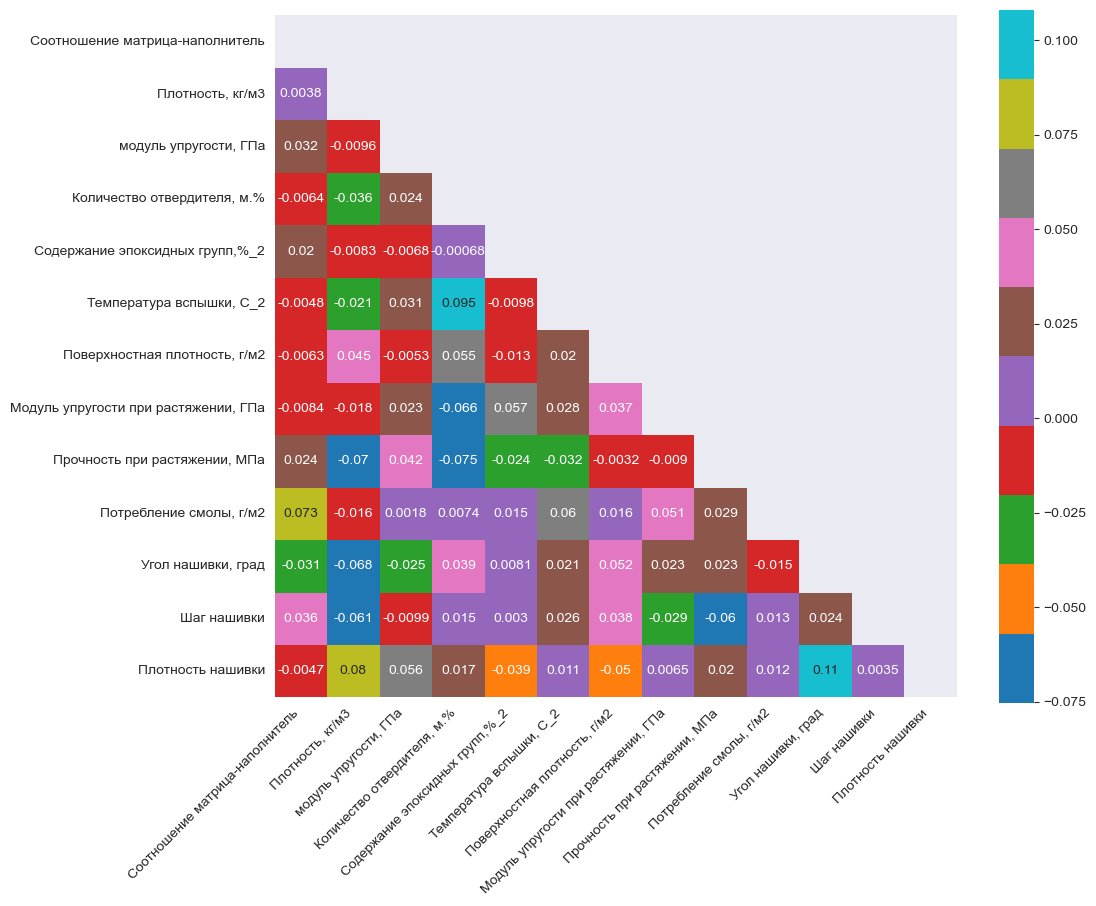

In [25]:
#Визуализация корреляционной матрицы с помощью тепловой карты
mask = np.triu(df.corr())
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (11, 9))
# # Визуализируем данные кореляции и создаем цветовую палитру
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'tab10')
plt.xticks(rotation = 45, ha='right')
plt.show()
# Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. 
# Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

Работа с выбросами

In [26]:
df = pd.read_excel(r"C:\Users\Александр\Desktop\вкр\itog (1).xlsx")

In [27]:
# Удаляем не информативный столбец
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of      Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           1.857143       2030.000000             738.736842   
1                           1.857143       2030.000000             738.736842   
2                           2.771331       2030.000000             753.000000   
3                           2.767918       2000.000000             748.000000   
4                           2.569620       1910.000000             807.000000   
..                               ...               ...                    ...   
917                         2.271346       1952.087902             912.855545   
918                         3.444022       2050.089171             444.732634   
919                         3.280604       1972.372865             416.836524   
920                         3.705351       2066.799773             741.475517   
921                         3.808020       1890.413468             417.316232  

In [28]:
df.columns
column_names = df.columns

In [29]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [30]:
# Метод 3-х сигм
metod_3s = 0
count_3s = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма.
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    metod_3s += d['3s'].sum()
    count_3s.append(d['3s'].sum())
    print(column,'3s', ': ', d['3s'].sum()) 
print('Метод 3-х сигм, выбросов:', metod_3s)


Соотношение матрица-наполнитель 3s :  0
Плотность, кг/м3 3s :  0
модуль упругости, ГПа 3s :  0
Количество отвердителя, м.% 3s :  0
Содержание эпоксидных групп,%_2 3s :  0
Температура вспышки, С_2 3s :  0
Поверхностная плотность, г/м2 3s :  0
Модуль упругости при растяжении, ГПа 3s :  0
Прочность при растяжении, МПа 3s :  0
Потребление смолы, г/м2 3s :  0
Угол нашивки 3s :  0
Шаг нашивки 3s :  0
Плотность нашивки 3s :  0
Метод 3-х сигм, выбросов: 0


In [31]:
# Удалим выборосы методом 3-х сигм
m_3s = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    m_3s[column] = (zscore.abs() > 3)
df = df[m_3s.sum(axis=1)==0]
df.shape

(922, 13)

In [32]:
# Сумма
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

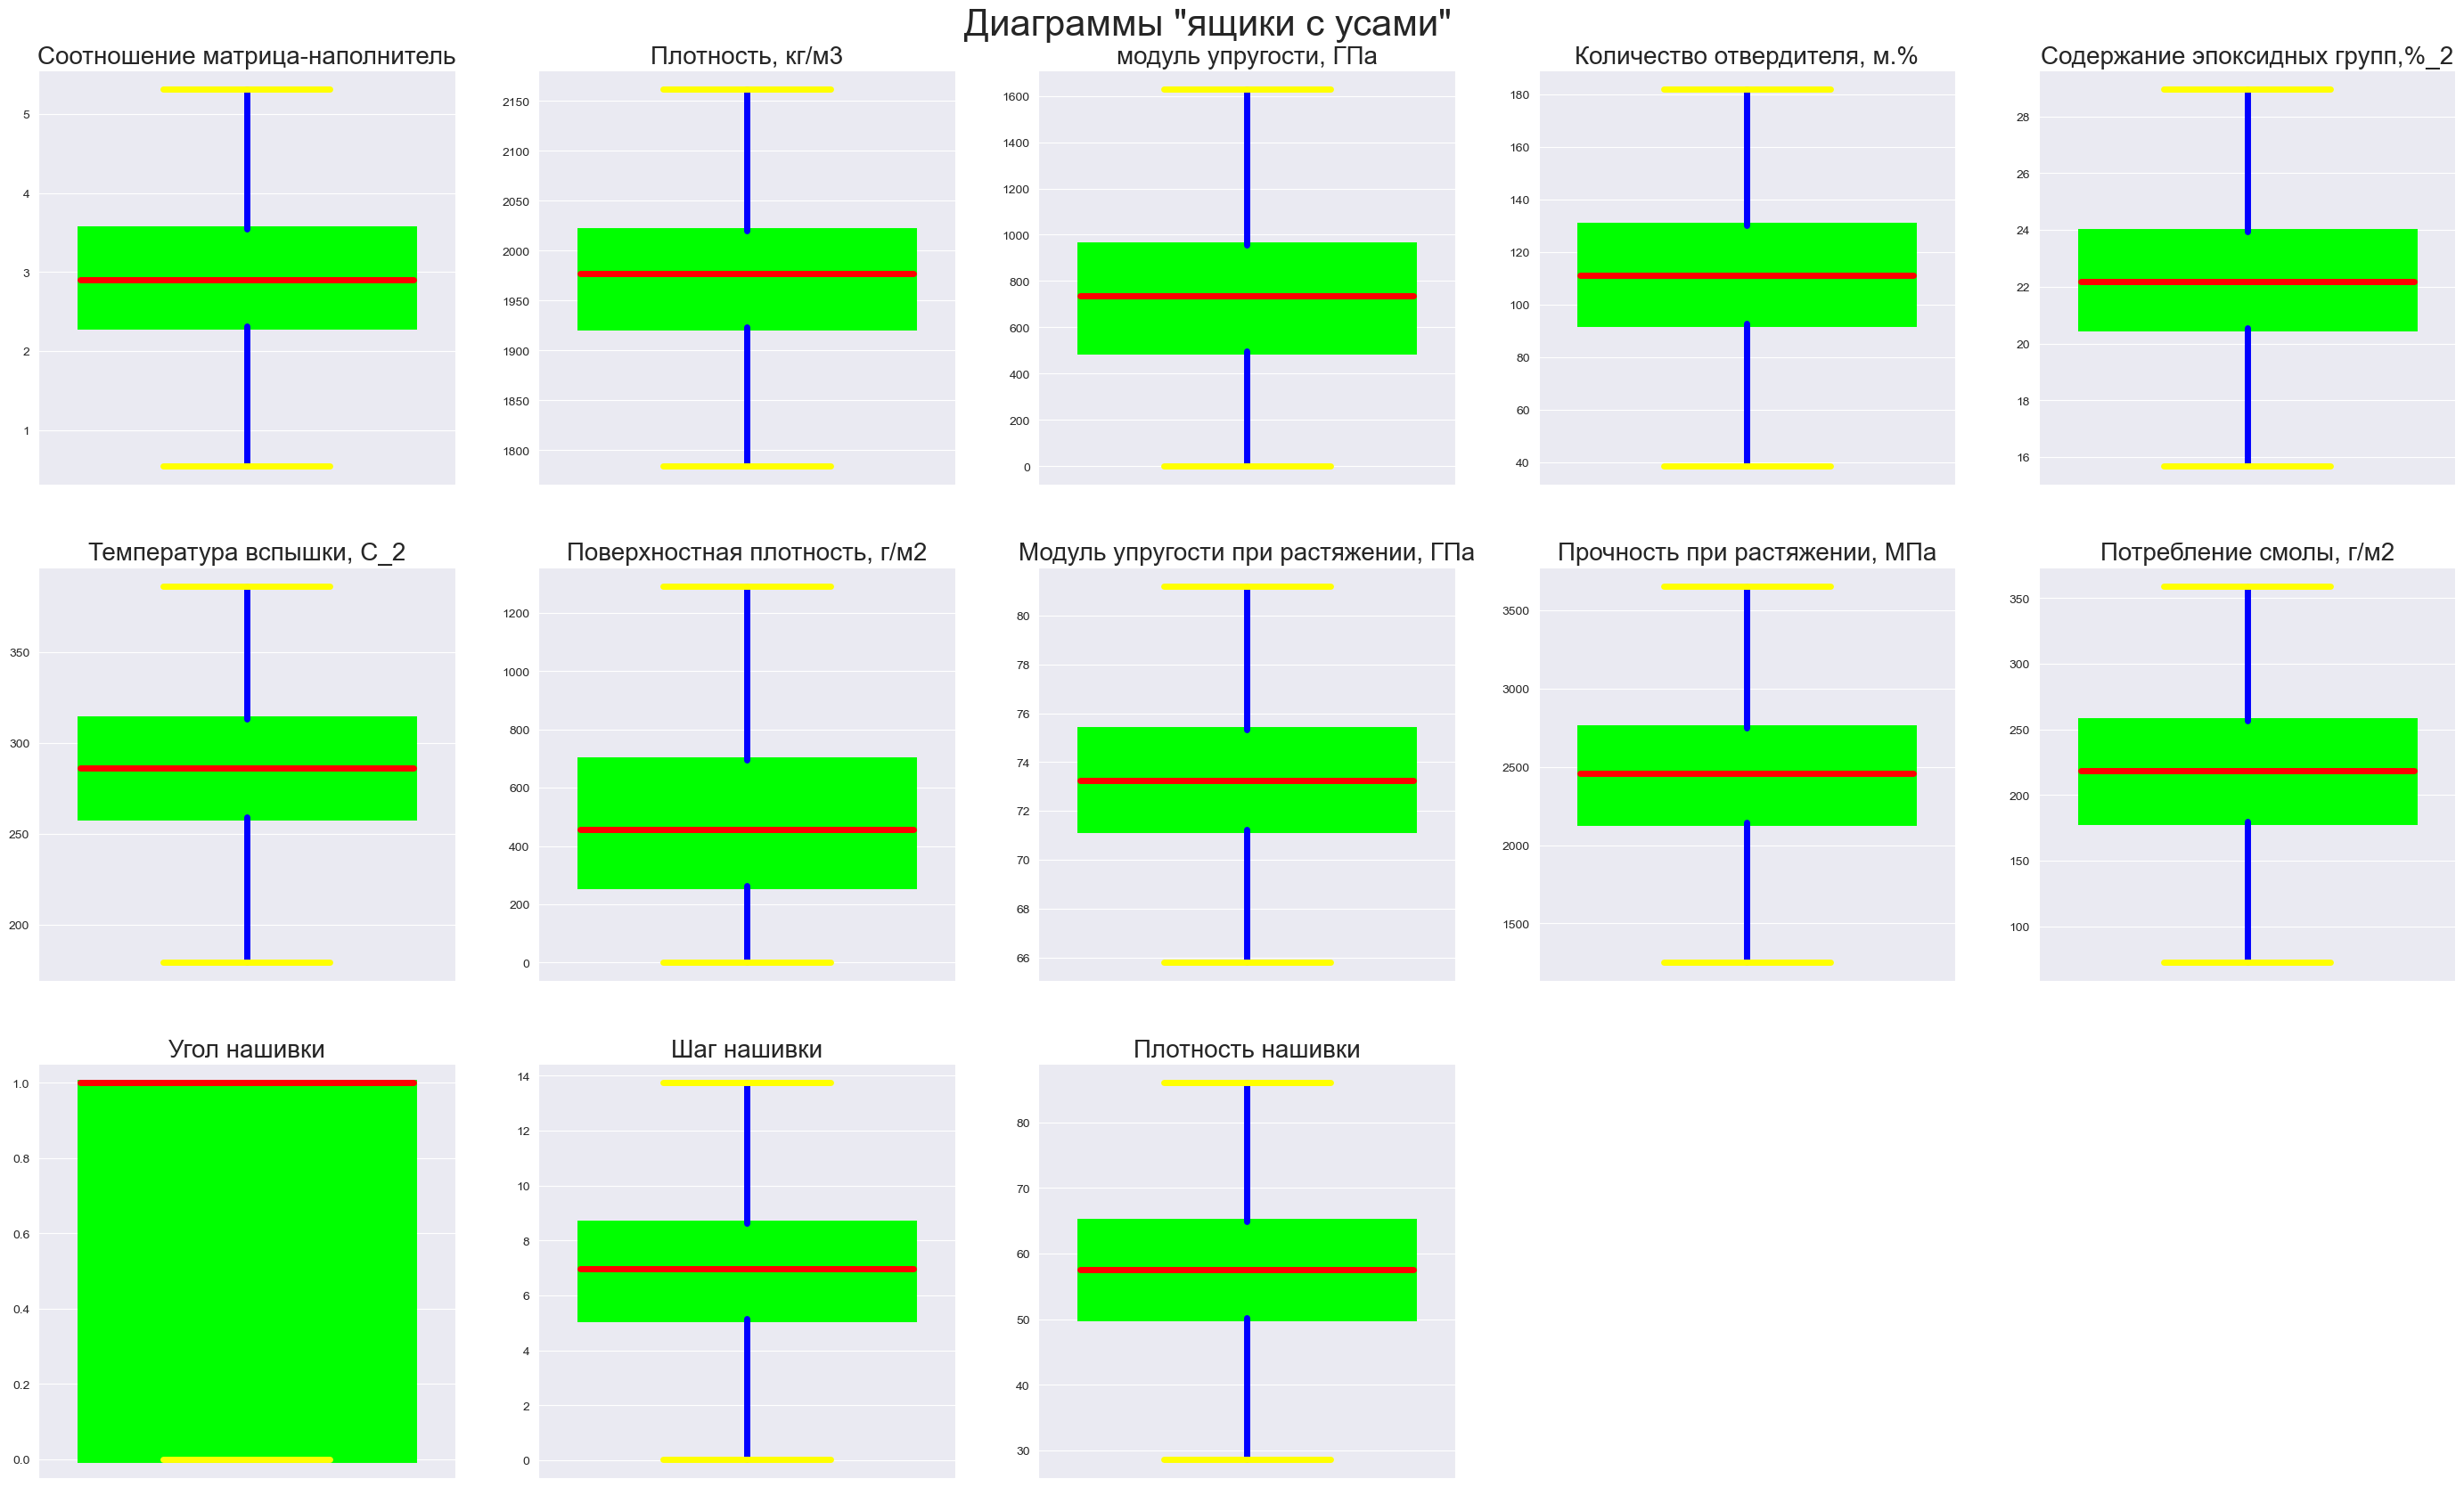

In [33]:
# Теперь посмотрим на очищенный усатый график 
a = 5 
b = 5 
c = 1 

plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y = df[col], fliersize = 15, linewidth = 5, boxprops = dict(facecolor = 'y', color = 'lime'), medianprops = dict(color = 'r'), whiskerprops = dict(color = "b"), capprops = dict(color="yellow"), flierprops = dict(color = "y", markeredgecolor = "Aqua"))
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1

In [34]:
clear = df.copy()
for column in df:
 zscore = (df[column] - df[column].mean()) / df[column].std()
 clear[column] = (zscore.abs() > 3)
clear = df[clear.sum(axis=1)==0]
clear.shape

(922, 13)

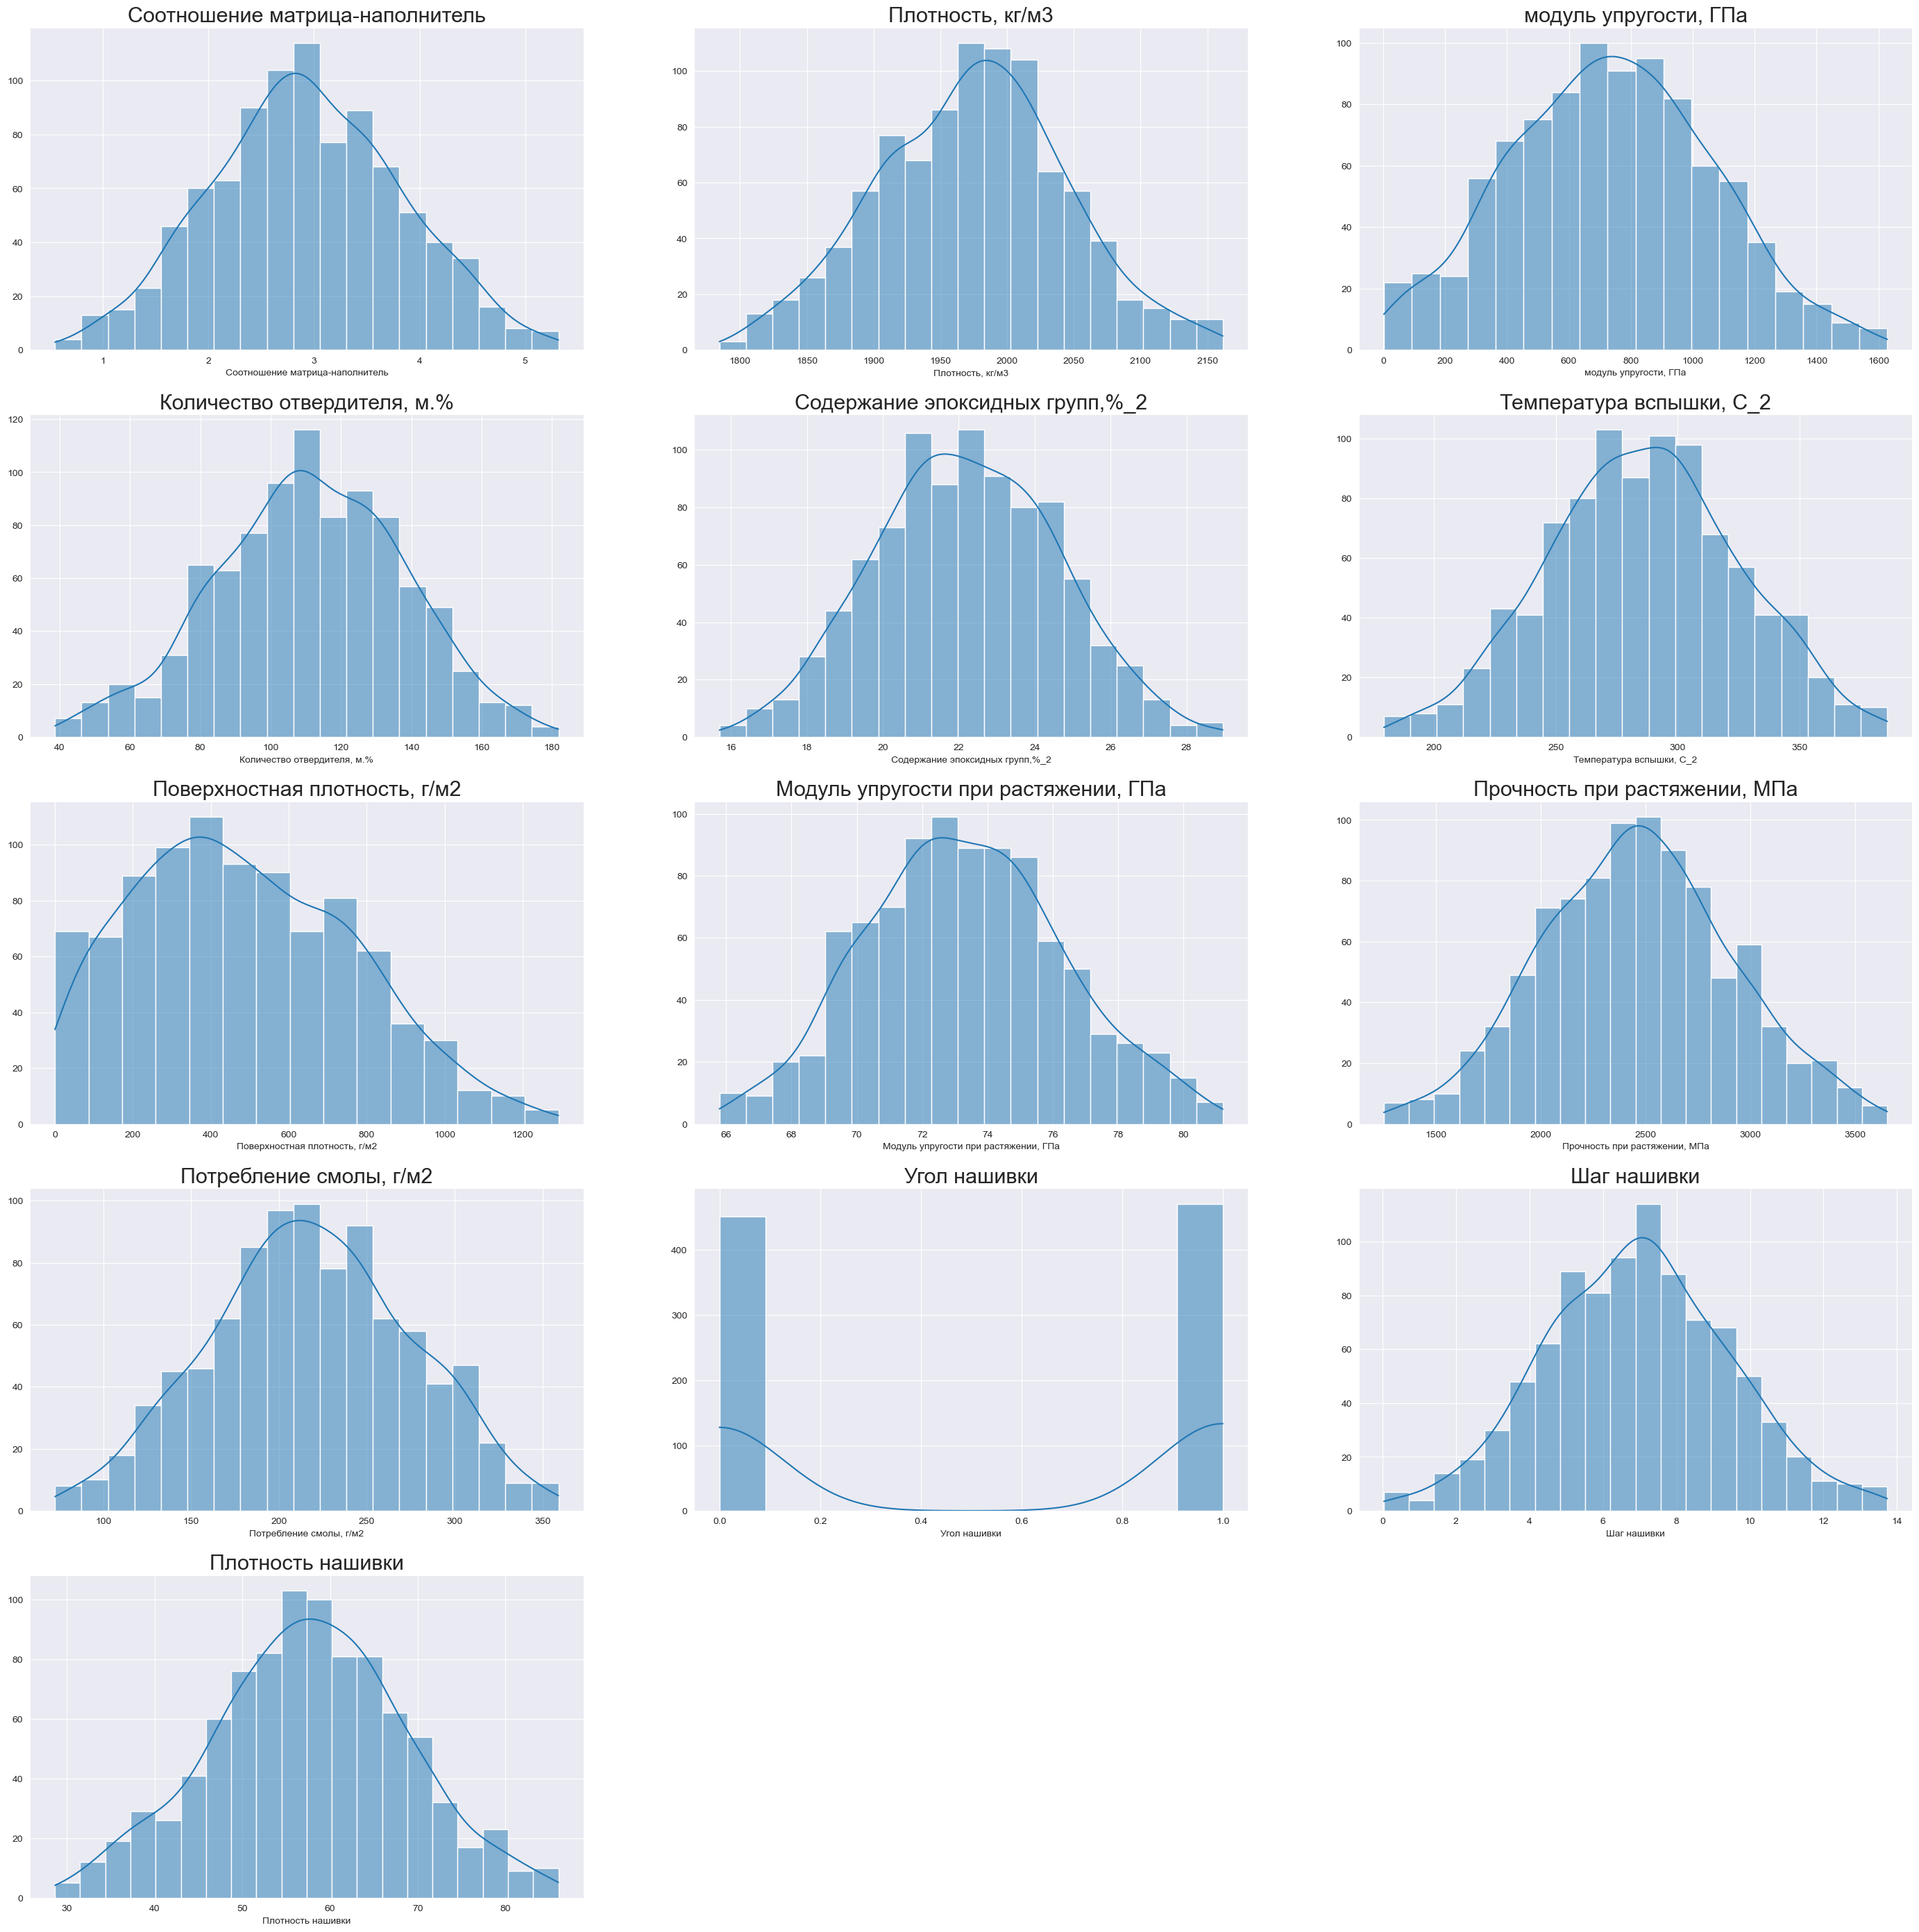

In [35]:
# Посмотрим  графики распределения переменных на очищенных данных
a = 5
b = 3
c = 1

plt.figure(figsize=(35,35))

for col in clear.columns:
  if col!='Угол нашивки, град':
    plt.subplot(a, b, c)
    sns.histplot(data = clear[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 22)
    c+=1

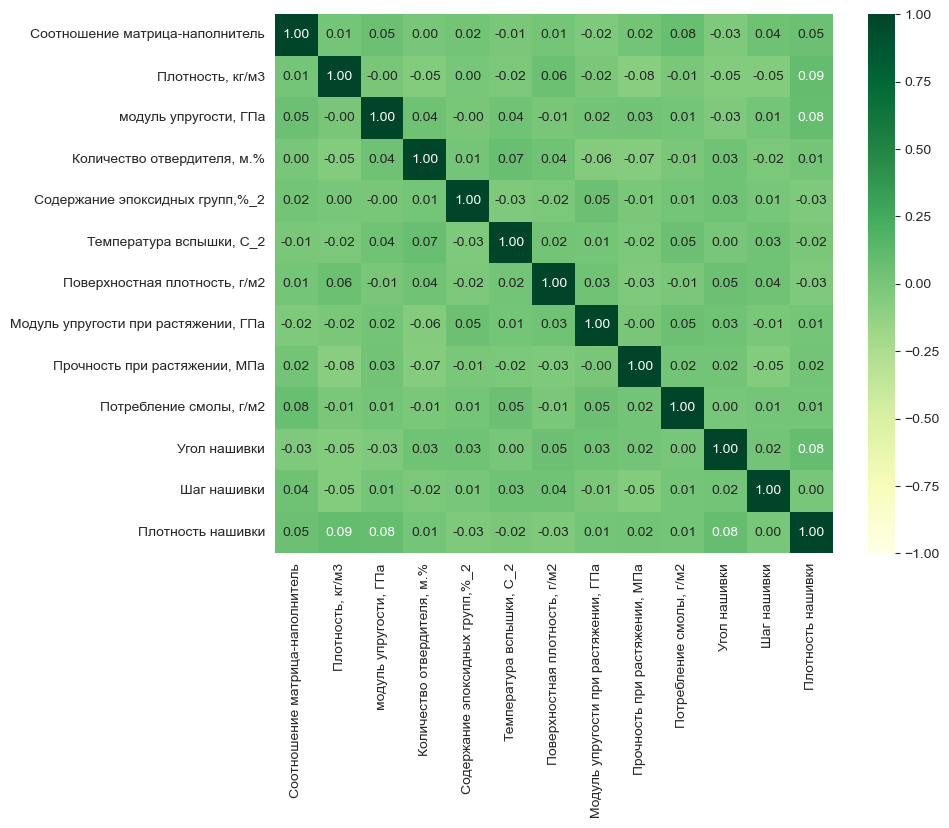

In [36]:
# Корреляционная матрица
corr = clear.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='YlGn', ax=ax)
plt.show()


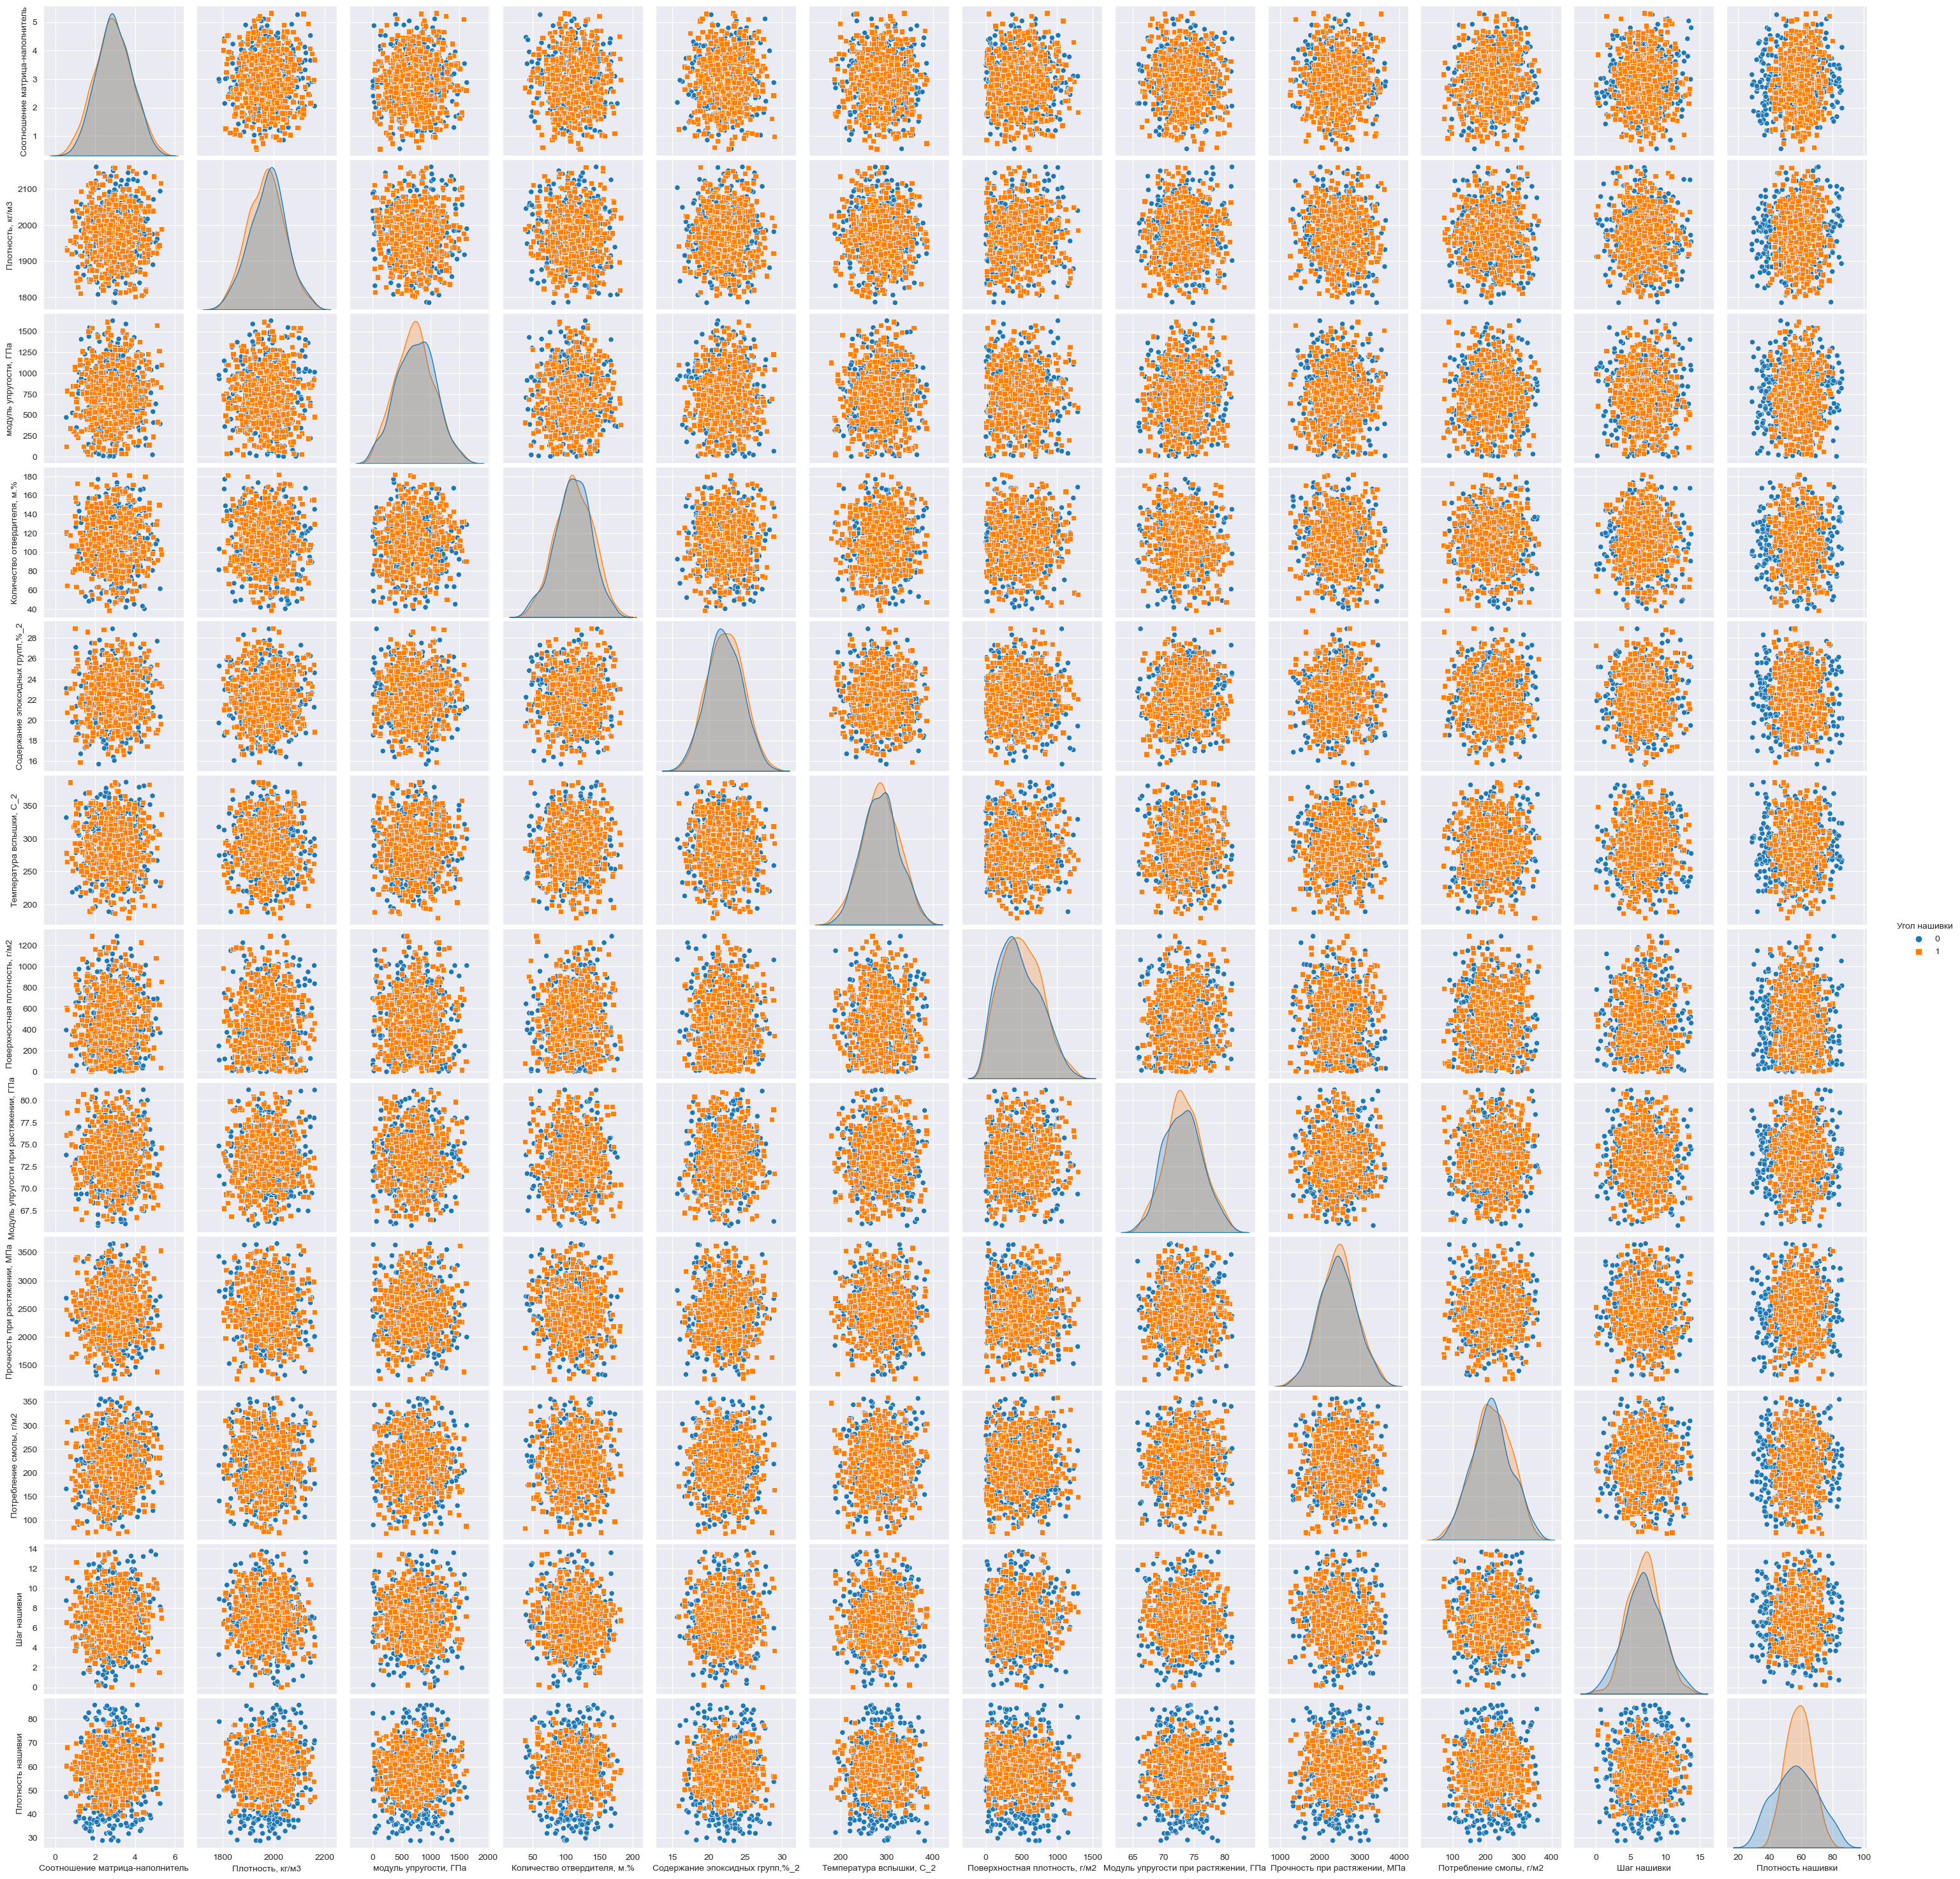

In [37]:
# Посмотрим еще здесь
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette = 'tab10')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 921
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки                          922 non-null    int64  
 11  Шаг нашивки        

In [39]:
#Сохраняем идеальный, без выбросов датасет, чтобы в excel проверить дополнительно
df.to_csv('C:\\Users\\Александр\\Desktop\\вкр\\Itog(2).csv', encoding = 'cp1251' )
df.to_excel("C:\\Users\\Александр\\Desktop\\вкр\\Itog(2).xlsx")

In [40]:
df_normal = df.copy()

In [41]:
# Нормализуем
scaler = preprocessing.MinMaxScaler()
col = df.columns
result = scaler.fit_transform(df)

df_minmax_n = pd.DataFrame(result, columns = col)
df_minmax_n.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          0.499412          0.502904   
std                           0.187858          0.188395   
min                           0.000000          0.000000   
25%                           0.371909          0.368184   
50%                           0.495189          0.511396   
75%                           0.629774          0.624719   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean                0.451341                     0.506200   
std                 0.201534                     0.186876   
min                 0.000000                     0.000000   
25%                 0.305188                     0.378514   
50%                 0.451377                     0.506382   
75%                 0.587193                     0.638735   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       922.000000                922.000000   
mean                          0.490578                  0.516739   
std                           0.180548                  0.190721   
min                           0.000000                  0.000000   
25%                           0.366571                  0.386228   
50%                           0.488852                  0.516931   
75%                           0.623046                  0.646553   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     922.000000                            922.000000   
mean                        0.373295                              0.487343   
std                         0.217269                              0.196366   
min                         0.000000                              0.000000   
25%                         0.204335                              0.353512   
50%                         0.354161                              0.483718   
75%                         0.538397                              0.617568   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                     922.000000               922.000000    922.000000   
mean                        0.503776                 0.507876      0.510846   
std                         0.188668                 0.199418      0.500154   
min                         0.000000                 0.000000      0.000000   
25%                         0.373447                 0.374647      0.000000   
50%                         0.501481                 0.510143      1.000000   
75%                         0.624299                 0.642511      1.000000   
max                         1.000000                 1.000000      1.000000   

       Шаг нашивки  Плотность нашивки  
count   922.000000         922.000000  
mean      0.503426           0.503938  
std       0.183587           0.193933  
min       0.000000           0.000000  
25%       0.372844           0.376869  
50%       0.506414           0.504310  
75%       0.626112           0.630842  
max       1.000000           1.000000

In [44]:
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_normal = pd.DataFrame(res, columns = df.columns)
df_normal

NameError: name 'Normalizer' is not defined

In [43]:
st_scaler = StandardScaler()
df_st = pd.DataFrame(st_scaler.fit_transform(clear), columns = clear.columns, index=clear.index)
df_st.describe()

NameError: name 'StandardScaler' is not defined

<AxesSubplot:ylabel='Density'>

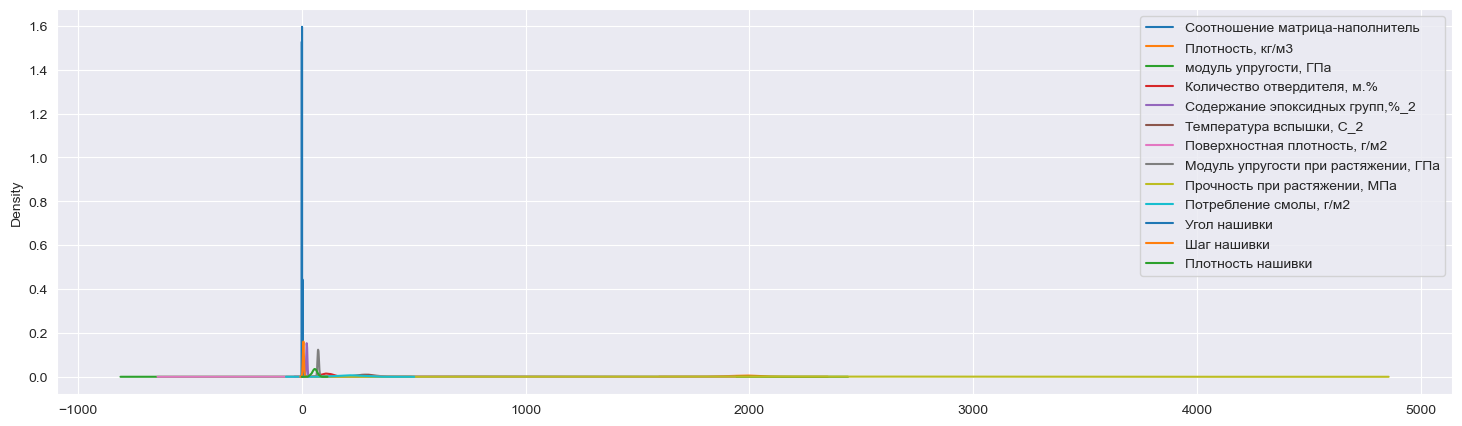

In [69]:
#строим график ядерной оценки плотности наших признаков до нормализации
fig, ax = plt.subplots(figsize = (18, 5))
df_normal.plot(kind = 'kde', ax = ax)

In [76]:
df_norm_n.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          0.000885          0.597049   
std                           0.000286          0.064504   
min                           0.000163          0.444650   
25%                           0.000685          0.552643   
50%                           0.000872          0.592130   
75%                           0.001068          0.640228   
max                           0.001803          0.824241   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean                0.220075                     0.033657   
std                 0.095713                     0.008973   
min                 0.000709                     0.011339   
25%                 0.150901                     0.027607   
50%                 0.219805                     0.033559   
75%                 0.289231                     0.039565   
max                 0.525102                     0.062919   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       922.000000                922.000000   
mean                          0.006717                  0.086572   
std                           0.001016                  0.015045   
min                           0.004113                  0.049402   
25%                           0.005990                  0.076193   
50%                           0.006654                  0.085003   
75%                           0.007346                  0.096585   
max                           0.010887                  0.147961   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     922.000000                            922.000000   
mean                        0.144885                              0.022174   
std                         0.083872                              0.002485   
min                         0.000230                              0.016108   
25%                         0.080748                              0.020407   
50%                         0.140105                              0.021973   
75%                         0.204309                              0.023759   
max                         0.414371                              0.030620   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                     922.000000               922.000000    922.000000   
mean                        0.731093                 0.065909      0.000155   
std                         0.069235                 0.018509      0.000153   
min                         0.463136                 0.021630      0.000000   
25%                         0.688177                 0.052457      0.000000   
50%                         0.740666                 0.065577      0.000244   
75%                         0.780691                 0.077899      0.000301   
max                         0.877580                 0.122973      0.000419   

       Шаг нашивки  Плотность нашивки  
count   922.000000         922.000000  
mean      0.002101           0.017401  
std       0.000808           0.003795  
min       0.000011           0.007195  
25%       0.001543           0.014860  
50%       0.002053           0.017293  
75%       0.002630           0.019756  
max       0.004519           0.030927

<AxesSubplot:ylabel='Density'>

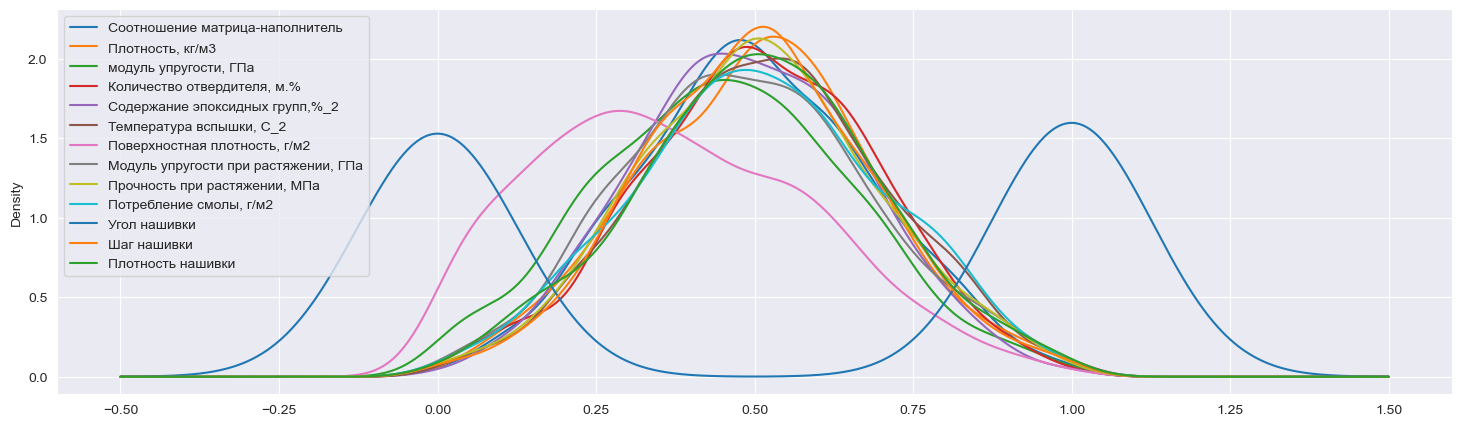

In [70]:
fig, ax = plt.subplots(figsize = (18, 5))
df_minmax_n.plot(kind = 'kde', ax = ax)

#Разбиение на обучающую и тестовую выборки

In [108]:

X_var = df_norm_n.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y_var = df_norm_n[['Модуль упругости при растяжении, ГПа']]

# Разбиение на обучающую и тестовую выборки для прогноза модуля упругости при растяжении
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X_var, y_var, test_size=0.3, random_state=1)

In [109]:
# Линейная регрессия.
lr = LinearRegression()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
lr.fit(X_train_var, y_train_var.iloc[:, 0])
lr_pred_var = lr.predict(X_test_var)
lr_mae_var = mean_absolute_error(lr_pred_var, y_test_var)
lr_mse_var = mean_squared_error(y_test_var, lr_pred_var)
lr_r2_train_var = lr.score(X_train_var, y_train_var)
lr_r2_var = r2_score(y_test_var, lr_pred_var)
print('LinearRegression Results')
print(f'mae: {lr_mae_var.round(3)}')
print(f'mse: {lr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {lr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {lr_r2_var.round(3)}')

LinearRegression Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.79
R2 на тестовой выборке: 0.786


In [112]:
#Гребневая регрессия 
ridge = RidgeCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
ridge.fit(X_train_var, y_train_var.iloc[:, 0])
ridge_pred_var = ridge.predict(X_test_var)
ridge_mae_var = mean_absolute_error(ridge_pred_var, y_test_var)
ridge_mse_var = mean_squared_error(y_test_var, ridge_pred_var)
ridge_r2_train_var = ridge.score(X_train_var, y_train_var)
ridge_r2_var= r2_score(y_test_var, ridge_pred_var)
print('RidgeCV Results')
print(f'mae: {ridge_mae_var.round(3)}')
print(f'mse: {ridge_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {ridge_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {ridge_r2_var.round(3)}')

RidgeCV Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.769
R2 на тестовой выборке: 0.78


In [113]:
#LASSO (Least Absolute Shrinkage and Selection Operator)
LCV = LassoCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
LCV.fit(X_train_var, y_train_var.iloc[:, 0])
LCV_pred_var = LCV.predict(X_test_var)
LCV_mae_var = mean_absolute_error(LCV_pred_var, y_test_var)
LCV_mse_var = mean_squared_error(y_test_var, LCV_pred_var)
LCV_r2_train_var = LCV.score(X_train_var, y_train_var)
LCV_r2_var = r2_score(y_test_var, LCV_pred_var)
print('LassoCV Results')
print(f'mae: {LCV_mae_var.round(3)}')
print(f'mse: {LCV_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {LCV_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {LCV_r2_var.round(3)}')

LassoCV Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.781
R2 на тестовой выборке: 0.788


In [115]:
#ElasticNet стремится объединить лучшее из гребневой регрессии и регрессии лассо, комбинируя регуляризацию L1 и L2
elastic = ElasticNetCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
elastic.fit(X_train_var, y_train_var.iloc[:, 0])
elastic_pred_var = (elastic.predict(X_test_var))
elastic_mae_var = mean_absolute_error(elastic_pred_var, y_test_var)
elastic_mse_var = mean_squared_error(y_test_var, elastic_pred_var)
elastic_r2_train_var = elastic.score(X_train_var, y_train_var)
elastic_r2_var = r2_score(y_test_var, elastic_pred_var)
print('ElasticNetCV Results')
print(f'mae: {elastic_mae_var.round(3)}')
print(f'mse: {elastic_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {elastic_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {elastic_r2_var.round(3)}')

ElasticNetCV Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.78
R2 на тестовой выборке: 0.788


In [116]:
#из-за специфической и высокодисперсной природы регрессии, просто как задачи машинного обучения, 
#регрессоры дерева решений следует тщательно обрезать. для поиска оптимальной глубины дерева необходимо применить
#инструмент оптимизации поиска параметров GridSearchCV

#параметры, подаваемые на перекрестную проверку методу поиска по сетке
rfr_param_grid = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                  'n_estimators': [1, 10, 20],
                  'max_depth': [1, 2, 5]}

#задаём параметры поиска лучшей комбинации гиперпараметров
rfr_gs_var = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=9, n_jobs=-1, verbose=1)

rfr_gs_var.fit(X_train_var, y_train_var.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {rfr_gs_var.best_params_}") #выводим лучшие параметры для наших выборок

Fitting 9 folds for each of 36 candidates, totalling 324 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 20}


In [117]:
# Обучаем модель для предсказания признака "Модуль упругости при растяжении"
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=1, max_depth=1)
rfr.fit(X_train_var, y_train_var.iloc[:, 0])
rfr_pred_var = rfr.predict(X_test_var)
rfr_mae_var = mean_absolute_error(rfr_pred_var, y_test_var)
rfr_mse_var = mean_squared_error(y_test_var, rfr_pred_var)
rfr_r2_train_var = rfr.score(X_train_var, y_train_var)
rfr_r2_var = r2_score(y_test_var, rfr_pred_var)
print('RandomForestRegressor Results')
print(f'mae: {rfr_mae_var.round(3)}')
print(f'mse: {rfr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {rfr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {rfr_r2_var.round(3)}')

RandomForestRegressor Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.491
R2 на тестовой выборке: 0.522


In [118]:
# к-соседи 

KNeighbors = list(range(1, 31))
knn_param_grid = {'n_neighbors': range(1, 31)}

#задаём параметры поиска лучшей комбинации гиперпараметров
knn_gs_var = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=9, n_jobs=-1, verbose=1)

knn_gs_var.fit(X_train_var, y_train_var.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {knn_gs_var.best_params_}")

Fitting 9 folds for each of 30 candidates, totalling 270 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'n_neighbors': 11}


In [119]:
# обучаем
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_var, y_train_var.iloc[:, 0])
knn_pred_var = knn.predict(X_test_var)
knn_mae_var = mean_absolute_error(knn_pred_var, y_test_var)
knn_mse_var = mean_squared_error(y_test_var, knn_pred_var)
knn_r2_train_var = knn.score(X_train_var, y_train_var)
knn_r2_var = r2_score(y_test_var, knn_pred_var)
print('KNeighborsRegressor Results')
print(f'mae: {knn_mae_var.round(3)}')
print(f'mse: {knn_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {knn_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {knn_r2_var.round(3)}')

KNeighborsRegressor Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 1.0
R2 на тестовой выборке: 0.45


In [122]:
# Опорные вектора
svr_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'C': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.1, 0.5]}

#поиск лучшей комбинации гиперпараметров
svr_gs_var = GridSearchCV(SVR(), svr_param_grid, cv=9, n_jobs=-1, verbose=1)

svr_gs_var.fit(X_train_var, y_train_var.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {svr_gs_var.best_params_}") 

Fitting 9 folds for each of 40 candidates, totalling 360 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'C': 1e-08, 'kernel': 'linear'}


In [123]:
# обучаем модель 
svr = SVR(C=1e-08, kernel='linear')
svr.fit(X_train_var, y_train_var.iloc[:, 0])
svr_pred_var = svr.predict(X_test_var)
svr_mae_var = mean_absolute_error(svr_pred_var, y_test_var)
svr_mse_var = mean_squared_error(y_test_var, svr_pred_var)
svr_r2_train_var = svr.score(X_train_var, y_train_var)
svr_r2_var = r2_score(y_test_var, svr_pred_var)
print('SVR Results')
print(f'mae: {svr_mae_var.round(3)}')
print(f'mse: {svr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {svr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {svr_r2_var.round(3)}')

SVR Results
mae: 0.002
mse: 0.0
R2 на тренировочной выборке: -0.216
R2 на тестовой выборке: -0.264


In [124]:
# Градиентный бустинг
gb_param_grid = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
                  'n_estimators': [1, 2, 5, 10],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 5, 10]}

#поиск лучшей комбинации гиперпараметров
gb_gs_var = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

gb_gs_var.fit(X_train_var, y_train_var.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {gb_gs_va.best_params_}")

Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'loss': 'squared_error', 'max_depth': 4, 'max_features': 10, 'n_estimators': 10}


In [125]:
gb = GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1)
gb.fit(X_train_var, y_train_var.iloc[:, 0])
gb_pred_var = gb.predict(X_test_var)
gb_mae_var = mean_absolute_error(gb_pred_var, y_test_var)
gb_mse_var = mean_squared_error(y_test_var, gb_pred_var)
gb_r2_train_var = gb.score(X_train_var, y_train_var)
gb_r2_var = r2_score(y_test_var, gb_pred_var)
print('GradientBoostingRegressor Results')
print(f'mae: {gb_mae_var.round(3)}')
print(f'mse: {gb_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {gb_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {gb_r2_var.round(3)}')

GradientBoostingRegressor Results
mae: 0.002
mse: 0.0
R2 на тренировочной выборке: 0.022
R2 на тестовой выборке: 0.022


In [126]:
# Деревья решений
dtr_param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 7, 9, 12],
                  'max_features': range(1, 15, 1)}

dtr_gs_var = GridSearchCV(DecisionTreeRegressor(), dtr_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

dtr_gs_var.fit(X_train_var, y_train_var.iloc [:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {dtr_gs_var.best_params_}")

Fitting 9 folds for each of 896 candidates, totalling 8064 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 12, 'splitter': 'best'}


In [127]:
# обучаем
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=1, max_features=1, splitter='best')
dtr.fit(X_train_var, y_train_var.iloc[:, 0])
dtr_pred_var = dtr.predict(X_test_var)
dtr_mae_var = mean_absolute_error(dtr_pred_var, y_test_var)
dtr_mse_var = mean_squared_error(y_test_var, dtr_pred_var)
dtr_r2_train_var = dtr.score(X_train_var, y_train_var)
dtr_r2_var = r2_score(y_test_var, dtr_pred_var)
print('DecisionTreeRegressor Results')
print(f'mae: {dtr_mae_var.round(3)}')
print(f'mse: {dtr_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {dtr_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {dtr_r2_var.round(3)}')

DecisionTreeRegressor Results
mae: 0.002
mse: 0.0
R2 на тренировочной выборке: 0.115
R2 на тестовой выборке: 0.13


In [ ]:
Создаем нейронную сеть

In [128]:
net_var = Sequential() #полносвязная
net_var.add(Dense(128, input_dim=X_train_var.shape[1], activation='relu'))
net_var.add(Dense(8, activation='relu'))
net_var.add(Dense(8, activation='relu'))
net_var.add(Dense(1, activation='linear')) #выходной слой с одним линейным нейроном для решения задачи регресси

In [129]:
#архитектура нашей модели
print(net_var.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,777
Trainable params: 2,777
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
net_var.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

In [132]:
# обучаем модель для предсказания признака "Модуль упругости при растяжении, ГПа"
history_var = net_var.fit(X_train_var, y_train_var.iloc[:, 0], epochs=100, validation_split=0.1, verbose=1)
print(f'Коэффициент детерминации для признака "{y_train_var.columns[0]}": {r2_score(y_test_var.iloc[:, 0], (net_var.predict(X_test_var)))}')

Epoch 1/100
19/19 [==============================] - 3s 37ms/step - loss: 5.9079e-05 - mae: 0.0061 - val_loss: 7.1355e-06 - val_mae: 0.0022
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 7.7975e-06 - mae: 0.0022 - val_loss: 5.3219e-06 - val_mae: 0.0019
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 4.6070e-06 - mae: 0.0017 - val_loss: 3.4181e-06 - val_mae: 0.0014
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 3.0648e-06 - mae: 0.0014 - val_loss: 2.4886e-06 - val_mae: 0.0012
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 2.3552e-06 - mae: 0.0012 - val_loss: 1.9797e-06 - val_mae: 0.0011
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 2.1310e-06 - mae: 0.0012 - val_loss: 1.8175e-06 - val_mae: 0.0011
Epoch 7/100
19/19 [==============================] - 0s 12ms/step - loss: 2.0689e-06 - mae: 0.0011 - val_loss: 1.8833e-06 - val_mae: 0.0011
Epoch 8/100
19/19 [==

In [133]:
net_pred_var = net_var.predict(X_test_var)
net_mae_var = mean_absolute_error(net_pred_var, y_test_var)
net_mse_var = mean_squared_error(y_test_var, net_pred_var)
net_r2_train_var = r2_score(y_train_var, net_var.predict(X_train_var))
net_r2_var = r2_score(y_test_var, net_pred_var)
print('net Results')
print(f'mae: {net_mae_var.round(3)}')
print(f'mse: {net_mse_var.round(3)}')
print(f'R2 на тренировочной выборке: {net_r2_train_var.round(3)}')
print(f'R2 на тестовой выборке: {net_r2_var.round(3)}')

21/21 [==============================] - 0s 4ms/step
net Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.781
R2 на тестовой выборке: 0.763


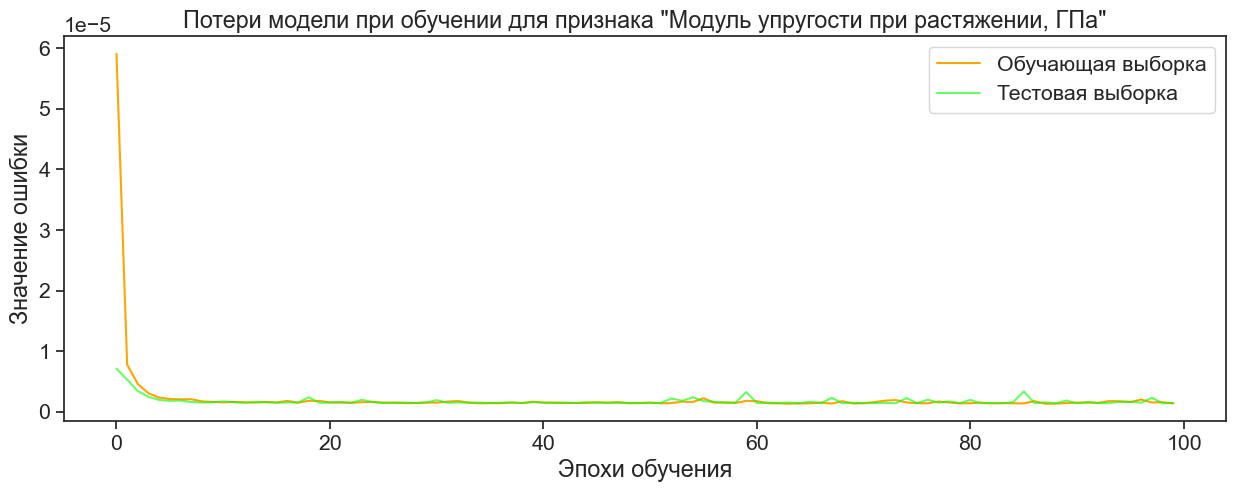

In [134]:
# визуализируем график потерь модели 
plt.figure(figsize = (15, 5))
sns.set(font_scale=1.4, style='ticks')
plt.plot(history_var.history['loss'], color='orange')
plt.plot(history_var.history['val_loss'], color='lime', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении, ГПа"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

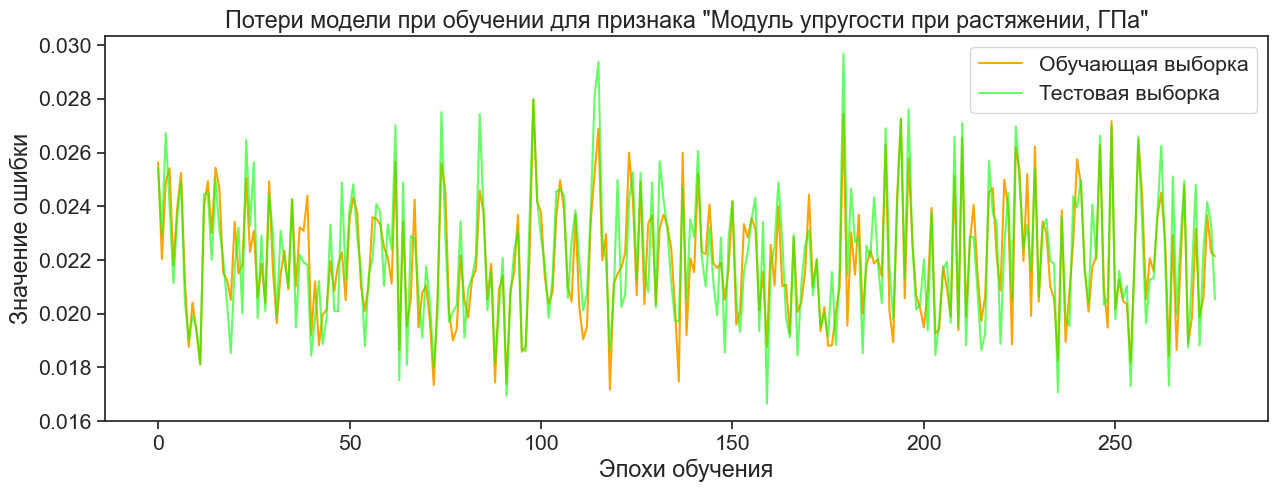

In [136]:
# визуализириуем данные для каждого признака
plt.figure(figsize = (15, 5))
plt.plot(net_pred_var, label='Прогнозные значения', color='orange')
plt.plot(y_test_var.iloc[:, 0].values, label="Тестовые значения", color='lime', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении, ГПа"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

In [137]:
# сравним результаты работу всех 10 моделей
df_r2_var = {'Регрессор':['LinearRegression', 'LCV', 'Ridge', 'ElasticNet', 'RandomForest', 'KNeighbors', 'SVR', 'GradientBoosting', 'DecisionTree', 'Нейросеть'],
                'MAE':[lr_mae_var, LCV_mae_var, ridge_mae_var, elastic_mae_var, rfr_mae_var, knn_mae_var, svr_mae_var, gb_mae_var, dtr_mae_var, net_mae_var],
                'MSE':[lr_mse_var, LCV_mae_var, ridge_mae_var, elastic_mae_var, rfr_mae_var, knn_mae_var, svr_mae_var, gb_mae_var, dtr_mae_var, net_mse_var],
                'R2_train':[lr_r2_train_var, LCV_r2_train_var, ridge_r2_train_var, elastic_r2_train_var, rfr_r2_train_var, knn_r2_train_var, svr_r2_train_var, gb_r2_train_var, dtr_r2_train_var, net_r2_train_var],
                'R2':[lr_r2_upr, LCV_r2_var, ridge_r2_var, elastic_r2_var, rfr_r2_var, knn_r2_var, svr_r2_var, gb_r2_var, dtr_r2_var, net_r2_var]} 
df_r2_var = pd.DataFrame(df_r2_var)
df_r2_var.sort_values(['R2'], ascending=False)

Регрессор       MAE       MSE  R2_train        R2
1               LCV  0.000924  0.000924  0.781435  0.788125
3        ElasticNet  0.000927  0.000927  0.780217  0.787506
0  LinearRegression  0.000926  0.000001  0.790300  0.785541
2             Ridge  0.000943  0.000943  0.769421  0.780106
9         Нейросеть  0.000976  0.000001  0.780727  0.762795
4      RandomForest  0.001365  0.001365  0.491490  0.522477
5        KNeighbors  0.001438  0.001438  1.000000  0.450428
8      DecisionTree  0.001836  0.001836  0.115351  0.130190
7  GradientBoosting  0.001967  0.001967  0.021917  0.022388
6               SVR  0.002270  0.002270 -0.215670 -0.264168

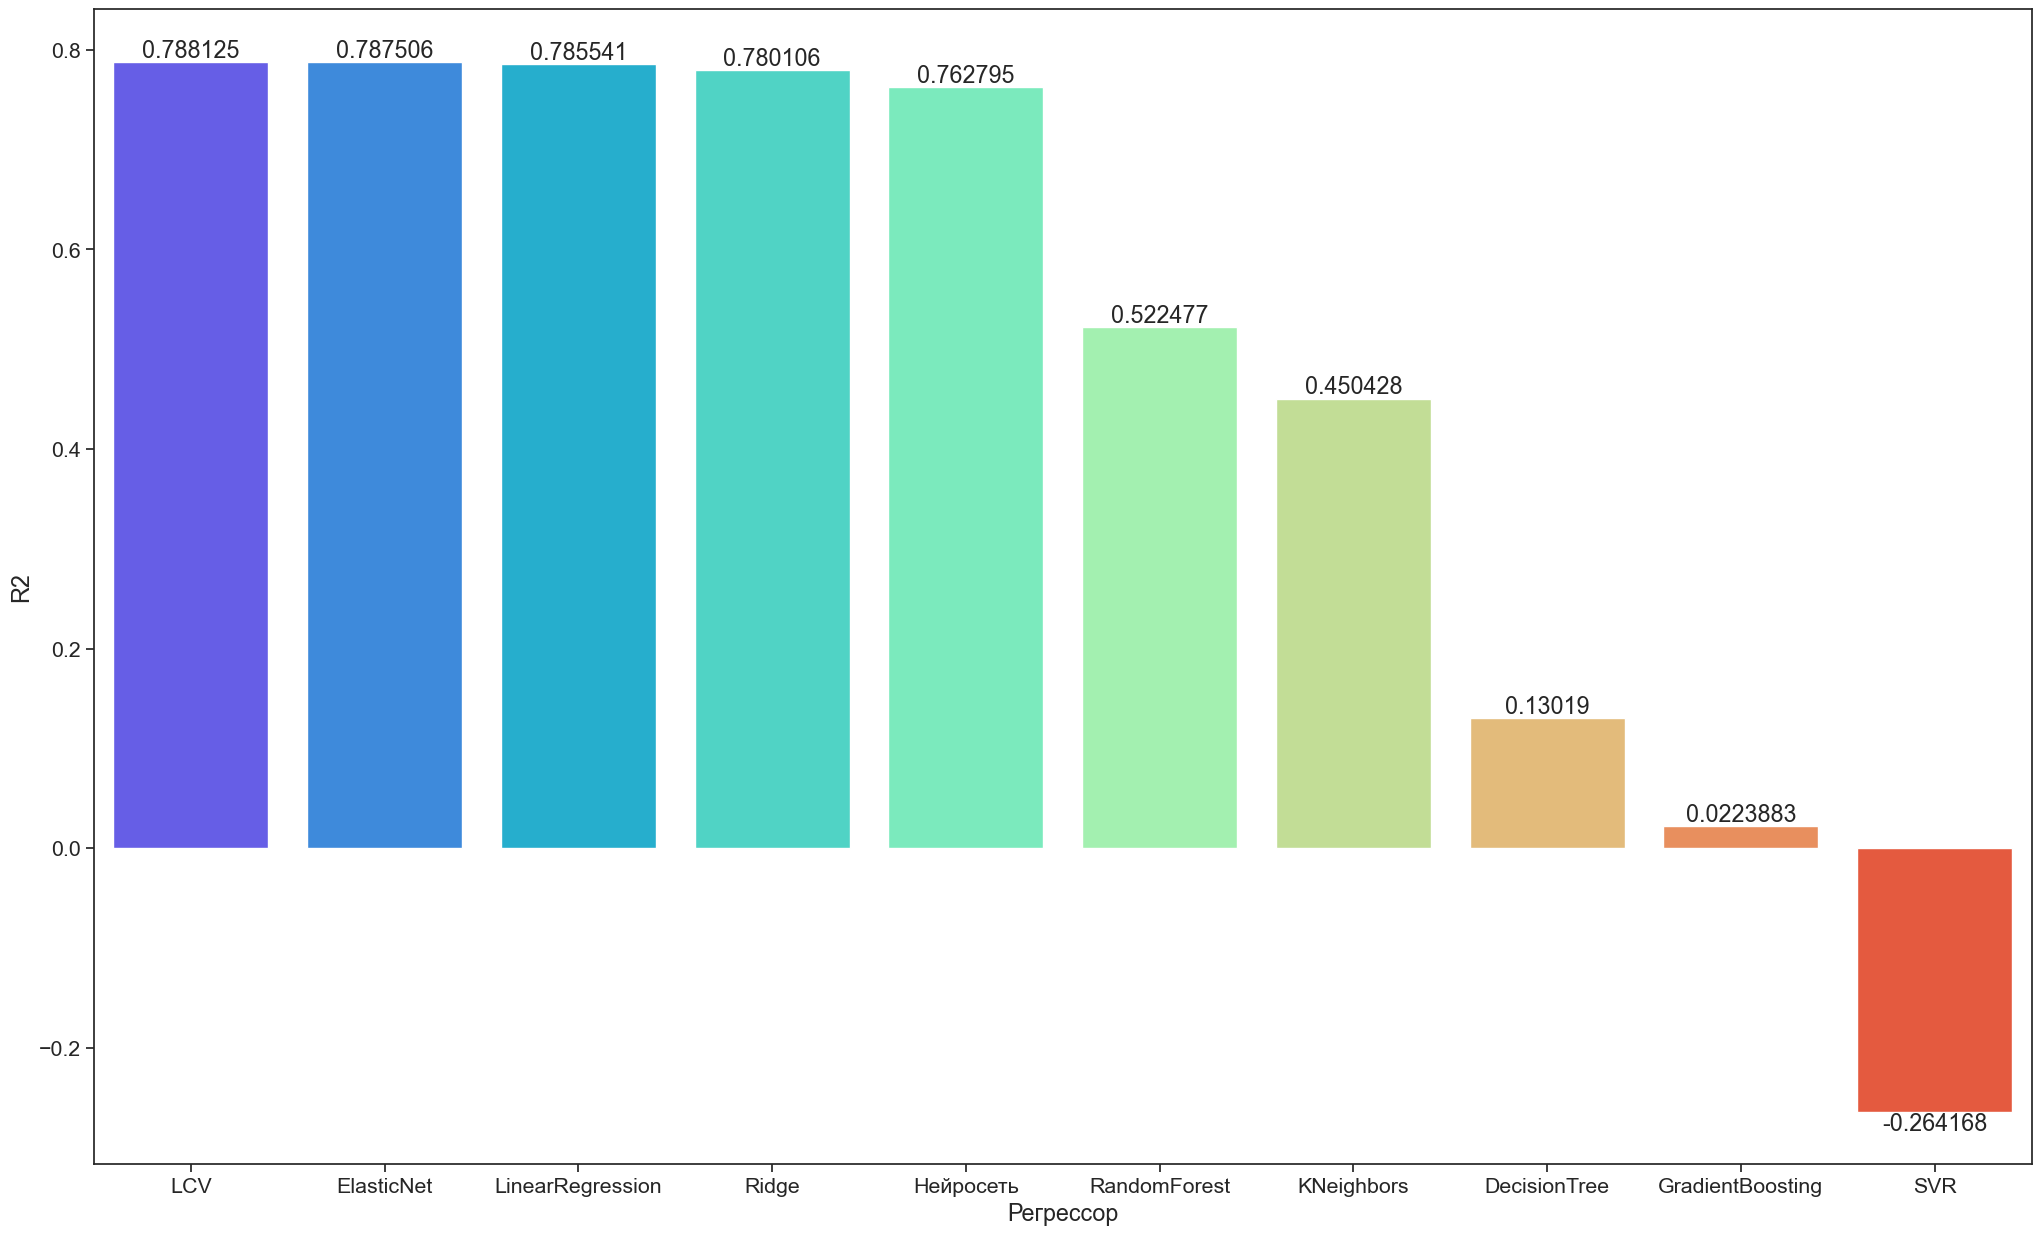

In [138]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(data=df_r2_var, x=df_r2_var['Регрессор'], y=df_r2_var['R2'], palette='rainbow', order=df_r2_var.sort_values('R2',ascending = False).Регрессор)
for i in ax.containers:
    ax.bar_label(i,)

In [140]:
#Линейная регрессия отлично подошла для этой задачи

In [146]:
#с набором параметров для предсказания признака "Модуль упругости при растяжении, ГПа"
model_var = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', LinearRegression())])
model_var.fit(X_train_var.values, y_train_var.iloc[:, 0].values) 

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', LinearRegression())])

In [147]:
# работоспособность
model_var_before = model_var.predict(X_test_var)
model_var_before[0]

0.025670357870284877

In [149]:
model_var_before_out = model_var_before * (np.max(df_norm_n['Модуль упругости при растяжении, ГПа'].values) - np.min(df_norm_n['Модуль упругости при растяжении, ГПа'].values)) + np.min(df_norm_n['Модуль упругости при растяжении, ГПа'].values)
model_var_before_out[0]

0.016480244497394672

In [157]:
X_va = df_norm_n.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y_va = df_norm_n[['Модуль упругости при растяжении, ГПа']]
X_train_va, X_test_va, y_train_va, y_test_va = train_test_split(X_va, y_va, test_size=0.3, random_state=1)

In [158]:
# Линейная регрессия.
lr = LinearRegression()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
lr.fit(X_train_va, y_train_va.iloc[:, 0])
lr_pred_va = lr.predict(X_test_va)
lr_mae_va = mean_absolute_error(lr_pred_va, y_test_va)
lr_mse_va = mean_squared_error(y_test_va, lr_pred_va)
lr_r2_train_va = lr.score(X_train_va, y_train_va)
lr_r2_va = r2_score(y_test_va, lr_pred_va)
print('LinearRegression Results')
print(f'mae: {lr_mae_va.round(3)}')
print(f'mse: {lr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {lr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {lr_r2_va.round(3)}')

LinearRegression Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.79
R2 на тестовой выборке: 0.786


In [159]:
#Гребневая регрессия 
ridge = RidgeCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
ridge.fit(X_train_va, y_train_var.iloc[:, 0])
ridge_pred_va = ridge.predict(X_test_va)
ridge_mae_va = mean_absolute_error(ridge_pred_va, y_test_va)
ridge_mse_va = mean_squared_error(y_test_va, ridge_pred_va)
ridge_r2_train_va = ridge.score(X_train_va, y_train_va)
ridge_r2_va= r2_score(y_test_va, ridge_pred_va)
print('RidgeCV Results')
print(f'mae: {ridge_mae_va.round(3)}')
print(f'mse: {ridge_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {ridge_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {ridge_r2_va.round(3)}')

RidgeCV Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.769
R2 на тестовой выборке: 0.78


In [160]:
#LASSO (Least Absolute Shrinkage and Selection Operator)
LCV = LassoCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
LCV.fit(X_train_va, y_train_va.iloc[:, 0])
LCV_pred_va = LCV.predict(X_test_va)
LCV_mae_va = mean_absolute_error(LCV_pred_va, y_test_va)
LCV_mse_va = mean_squared_error(y_test_va, LCV_pred_va)
LCV_r2_train_va = LCV.score(X_train_va, y_train_va)
LCV_r2_va = r2_score(y_test_va, LCV_pred_va)
print('LassoCV Results')
print(f'mae: {LCV_mae_va.round(3)}')
print(f'mse: {LCV_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {LCV_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {LCV_r2_va.round(3)}')

LassoCV Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.781
R2 на тестовой выборке: 0.788


In [161]:
#ElasticNet стремится объединить лучшее из гребневой регрессии и регрессии лассо, комбинируя регуляризацию L1 и L2
elastic = ElasticNetCV()

#обучаем модель для предсказания признака "Модуль упругости при растяжении"
elastic.fit(X_train_va, y_train_va.iloc[:, 0])
elastic_pred_va = (elastic.predict(X_test_va))
elastic_mae_va = mean_absolute_error(elastic_pred_va, y_test_va)
elastic_mse_va = mean_squared_error(y_test_va, elastic_pred_va)
elastic_r2_train_va = elastic.score(X_train_va, y_train_va)
elastic_r2_va = r2_score(y_test_va, elastic_pred_va)
print('ElasticNetCV Results')
print(f'mae: {elastic_mae_va.round(3)}')
print(f'mse: {elastic_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {elastic_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {elastic_r2_va.round(3)}')

ElasticNetCV Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.78
R2 на тестовой выборке: 0.788


In [162]:
#из-за специфической и высокодисперсной природы регрессии, просто как задачи машинного обучения, 
#регрессоры дерева решений следует тщательно обрезать. для поиска оптимальной глубины дерева необходимо применить
#инструмент оптимизации поиска параметров GridSearchCV

#параметры, подаваемые на перекрестную проверку методу поиска по сетке
rfr_param_grid = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                  'n_estimators': [1, 10, 20],
                  'max_depth': [1, 2, 5]}

#задаём параметры поиска лучшей комбинации гиперпараметров
rfr_gs_va = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=9, n_jobs=-1, verbose=1)

rfr_gs_va.fit(X_train_var, y_train_va.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {rfr_gs_va.best_params_}") #выводим лучшие параметры для наших выборок

Fitting 9 folds for each of 36 candidates, totalling 324 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 10}


In [163]:
# Обучаем модель для предсказания признака "Модуль упругости при растяжении"
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=1, max_depth=1)
rfr.fit(X_train_va, y_train_va.iloc[:, 0])
rfr_pred_va = rfr.predict(X_test_va)
rfr_mae_va = mean_absolute_error(rfr_pred_va, y_test_va)
rfr_mse_va = mean_squared_error(y_test_va, rfr_pred_va)
rfr_r2_train_va = rfr.score(X_train_va, y_train_va)
rfr_r2_va = r2_score(y_test_va, rfr_pred_va)
print('RandomForestRegressor Results')
print(f'mae: {rfr_mae_va.round(3)}')
print(f'mse: {rfr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {rfr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {rfr_r2_va.round(3)}')

RandomForestRegressor Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.492
R2 на тестовой выборке: 0.525


In [164]:
# к-соседи 

KNeighbors = list(range(1, 31))
knn_param_grid = {'n_neighbors': range(1, 31)}

#задаём параметры поиска лучшей комбинации гиперпараметров
knn_gs_va = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=9, n_jobs=-1, verbose=1)

knn_gs_va.fit(X_train_va, y_train_va.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {knn_gs_var.best_params_}")

Fitting 9 folds for each of 30 candidates, totalling 270 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'n_neighbors': 11}


In [165]:
# обучаем
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_va, y_train_va.iloc[:, 0])
knn_pred_va = knn.predict(X_test_va)
knn_mae_va = mean_absolute_error(knn_pred_va, y_test_va)
knn_mse_va = mean_squared_error(y_test_va, knn_pred_va)
knn_r2_train_va = knn.score(X_train_va, y_train_va)
knn_r2_va = r2_score(y_test_va, knn_pred_va)
print('KNeighborsRegressor Results')
print(f'mae: {knn_mae_va.round(3)}')
print(f'mse: {knn_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {knn_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {knn_r2_va.round(3)}')

KNeighborsRegressor Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 1.0
R2 на тестовой выборке: 0.45


In [166]:
# Опорные вектора
svr_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'C': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.1, 0.5]}

#поиск лучшей комбинации гиперпараметров
svr_gs_va = GridSearchCV(SVR(), svr_param_grid, cv=9, n_jobs=-1, verbose=1)

svr_gs_va.fit(X_train_var, y_train_va.iloc[:, 0]) #применяем поиск
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {svr_gs_va.best_params_}") 

Fitting 9 folds for each of 40 candidates, totalling 360 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'C': 1e-08, 'kernel': 'linear'}


In [167]:
# обучаем модель 
svr = SVR(C=1e-08, kernel='linear')
svr.fit(X_train_va, y_train_va.iloc[:, 0])
svr_pred_va = svr.predict(X_test_va)
svr_mae_va = mean_absolute_error(svr_pred_va, y_test_va)
svr_mse_va = mean_squared_error(y_test_va, svr_pred_va)
svr_r2_train_va = svr.score(X_train_va, y_train_va)
svr_r2_va = r2_score(y_test_va, svr_pred_va)
print('SVR Results')
print(f'mae: {svr_mae_va.round(3)}')
print(f'mse: {svr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {svr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {svr_r2_va.round(3)}')

SVR Results
mae: 0.002
mse: 0.0
R2 на тренировочной выборке: -0.216
R2 на тестовой выборке: -0.264


In [168]:
# Градиентный бустинг
gb_param_grid = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
                  'n_estimators': [1, 2, 5, 10],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 5, 10]}

#поиск лучшей комбинации гиперпараметров
gb_gs_va = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

gb_gs_va.fit(X_train_va, y_train_va.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {gb_gs_va.best_params_}")

Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'loss': 'squared_error', 'max_depth': 5, 'max_features': 10, 'n_estimators': 10}


In [169]:
gb = GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1)
gb.fit(X_train_va, y_train_va.iloc[:, 0])
gb_pred_va = gb.predict(X_test_va)
gb_mae_va = mean_absolute_error(gb_pred_va, y_test_va)
gb_mse_va = mean_squared_error(y_test_va, gb_pred_va)
gb_r2_train_va = gb.score(X_train_va, y_train_va)
gb_r2_va = r2_score(y_test_va, gb_pred_va)
print('GradientBoostingRegressor Results')
print(f'mae: {gb_mae_va.round(3)}')
print(f'mse: {gb_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {gb_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {gb_r2_va.round(3)}')

GradientBoostingRegressor Results
mae: 0.002
mse: 0.0
R2 на тренировочной выборке: 0.002
R2 на тестовой выборке: -0.002


In [170]:
# Деревья решений
dtr_param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 7, 9, 12],
                  'max_features': range(1, 15, 1)}

dtr_gs_va = GridSearchCV(DecisionTreeRegressor(), dtr_param_grid, cv=9, 
                   n_jobs=-1, verbose=1)

dtr_gs_va.fit(X_train_va, y_train_va.iloc [:, 0])
print(f"Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {dtr_gs_va.best_params_}")

Fitting 9 folds for each of 896 candidates, totalling 8064 fits
Лучшие параметры для предсказания признака 'Модуль упругости при растяжении' {'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 12, 'splitter': 'best'}


In [171]:
# обучаем
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=1, max_features=1, splitter='best')
dtr.fit(X_train_va, y_train_va.iloc[:, 0])
dtr_pred_va = dtr.predict(X_test_va)
dtr_mae_va = mean_absolute_error(dtr_pred_va, y_test_va)
dtr_mse_va = mean_squared_error(y_test_va, dtr_pred_va)
dtr_r2_train_va = dtr.score(X_train_va, y_train_va)
dtr_r2_va = r2_score(y_test_va, dtr_pred_va)
print('DecisionTreeRegressor Results')
print(f'mae: {dtr_mae_va.round(3)}')
print(f'mse: {dtr_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {dtr_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {dtr_r2_va.round(3)}')

DecisionTreeRegressor Results
mae: 0.002
mse: 0.0
R2 на тренировочной выборке: 0.27
R2 на тестовой выборке: 0.285


In [ ]:
Создаем нейронную сеть

In [10]:
net_va = Sequential()
net_va.add(Dense(128, input_dim=X_train_va.shape[1], activation='relu'))
net_va.add(Dense(8, activation='relu'))
net_va.add(Dense(8, activation='relu'))
net_va.add(Dense(1, activation='linear')) #выходной слой с одним линейным нейроном для решения задачи регрессии

NameError: name 'X_train_va' is not defined

In [174]:
print(net_va.summary()) #архитектура нашей модели

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1664      
                                                                 
 dense_9 (Dense)             (None, 8)                 1032      
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,777
Trainable params: 2,777
Non-trainable params: 0
_________________________________________________________________
None


In [175]:
net_va.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

In [176]:
#обучаем модель для предсказания признака "Прочность при растяжении, МПа"
history_va = net_va.fit(X_train_va, y_train_va.iloc[:, 0], epochs=100, validation_split=0.1, verbose=1)
#рассчитаем коэффицент детерминации искуственной нейронной сети для признака "Прочность при растяжении, МПа"
print(f'Коэффициент детерминации для признака "{y_train_va.columns[0]}": {r2_score(y_test_va.iloc[:, 0], (net_va.predict(X_test_va)))}')

Epoch 1/100
19/19 [==============================] - 3s 28ms/step - loss: 2.9357e-05 - mae: 0.0040 - val_loss: 8.0525e-06 - val_mae: 0.0023
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 7.0277e-06 - mae: 0.0021 - val_loss: 3.6779e-06 - val_mae: 0.0015
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 3.6831e-06 - mae: 0.0015 - val_loss: 1.6617e-06 - val_mae: 0.0011
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 2.1151e-06 - mae: 0.0012 - val_loss: 1.3493e-06 - val_mae: 9.6726e-04
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 1.7457e-06 - mae: 0.0011 - val_loss: 1.2629e-06 - val_mae: 9.1430e-04
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 1.7415e-06 - mae: 0.0010 - val_loss: 1.7022e-06 - val_mae: 0.0011
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 1.7655e-06 - mae: 0.0011 - val_loss: 1.3713e-06 - val_mae: 9.4467e-04
Epoch 8/

In [179]:
net_pred_va = net_va.predict(X_test_va)
net_mae_va = mean_absolute_error(net_pred_va, y_test_va)
net_mse_va = mean_squared_error(y_test_va, net_pred_va)
net_r2_train_va = r2_score(y_train_va, net_va.predict(X_train_va))
net_r2_va = r2_score(y_test_va, net_pred_va)
print('net Results')
print(f'mae: {net_mae_va.round(3)}')
print(f'mse: {net_mse_va.round(3)}')
print(f'R2 на тренировочной выборке: {net_r2_train_va.round(3)}')
print(f'R2 на тестовой выборке: {net_r2_va.round(3)}')

21/21 [==============================] - 0s 4ms/step
net Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: 0.738
R2 на тестовой выборке: 0.725


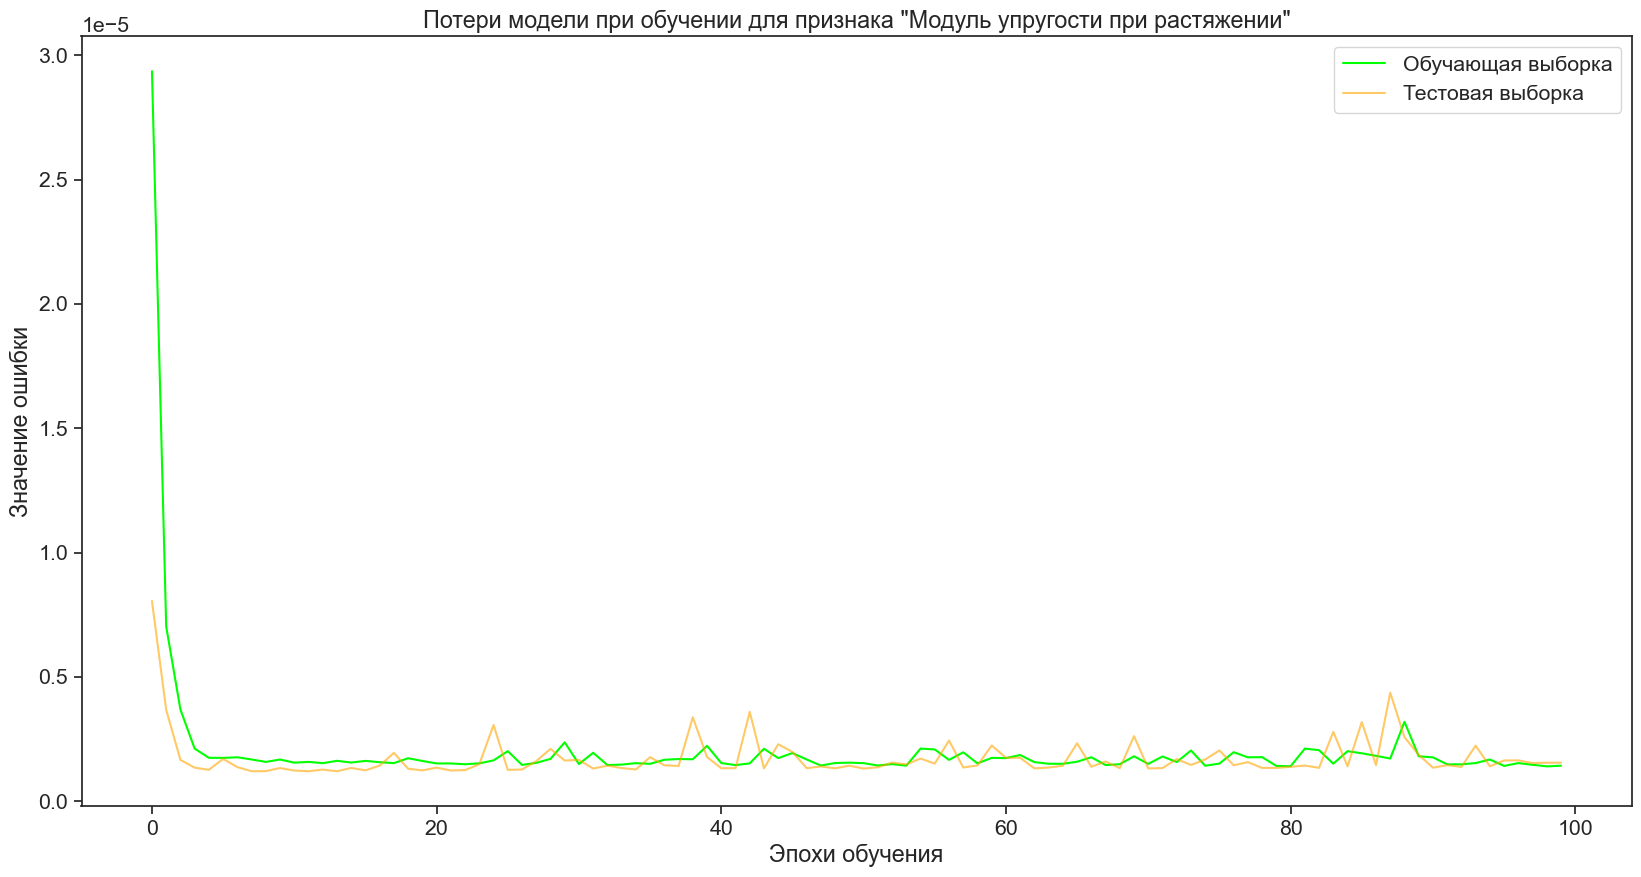

In [181]:
plt.figure(figsize = (20, 10))
sns.set(font_scale=1.4, style='ticks')
plt.plot(history_va.history['loss'], color='lime')
plt.plot(history_va.history['val_loss'], color='orange', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

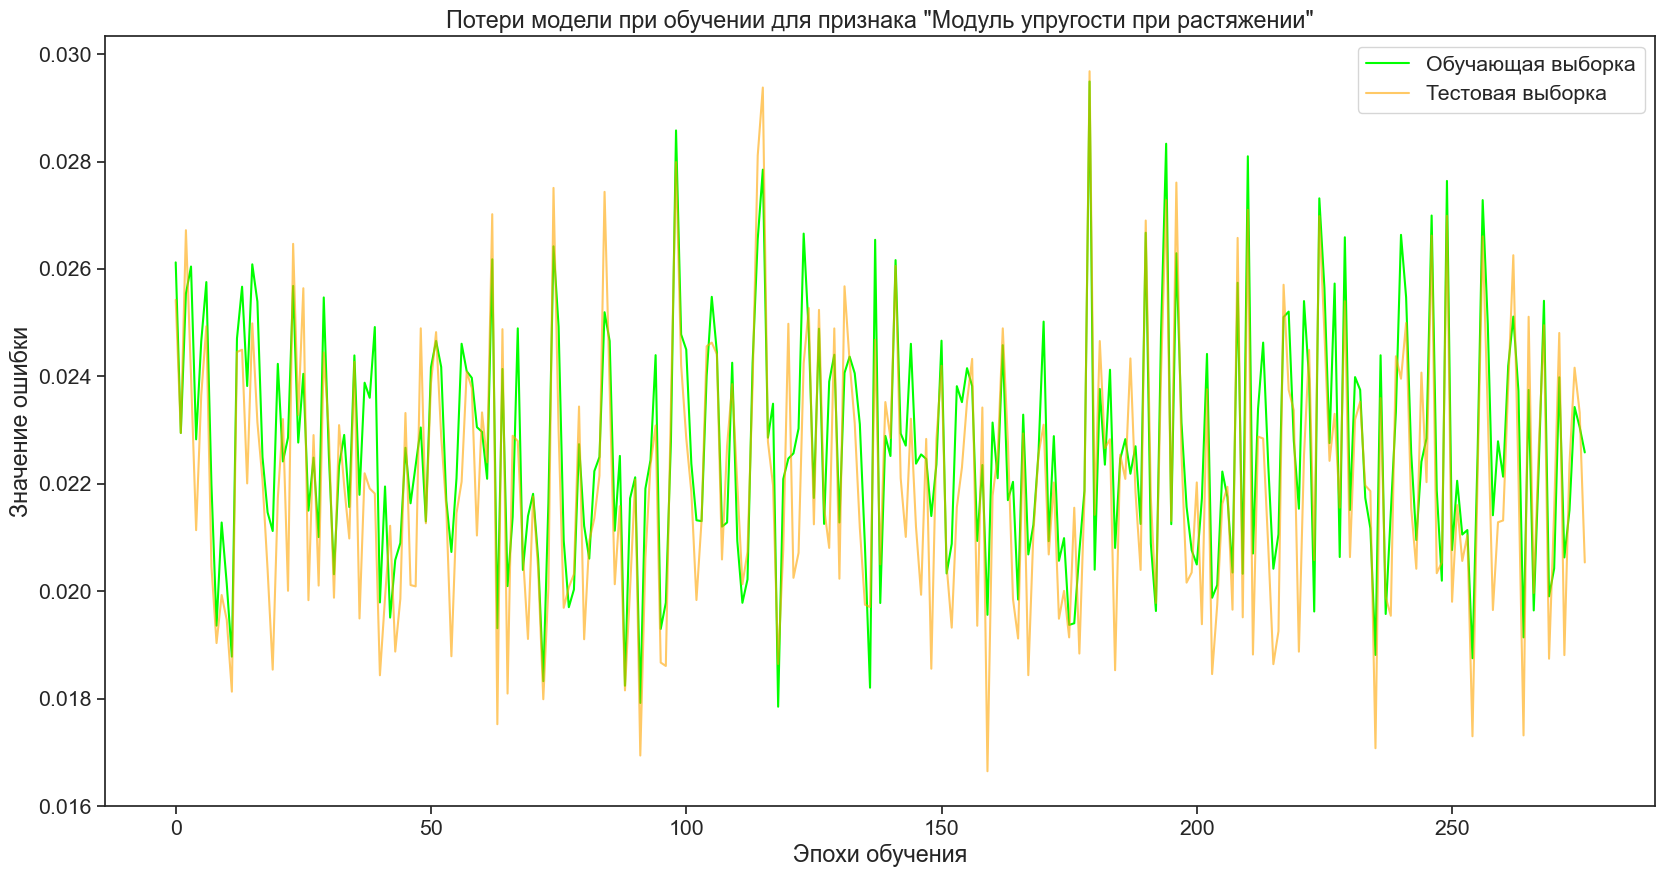

In [182]:
plt.figure(figsize = (20, 10))
plt.plot(net_pred_va, label='Прогнозные значения', color='lime')
plt.plot(y_test_va.iloc[:, 0].values, label="Тестовые значения", color='orange', alpha=0.6)
plt.title('Потери модели при обучении для признака "Модуль упругости при растяжении"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

In [184]:
df_r2_va = {'Регрессор':['LinearRegression', 'LCV', 'Ridge', 'ElasticNet', 'RandomForest', 'KNeighbors', 'SVR', 'GradientBoosting', 'DecisionTree', 'Нейросеть'],
                'MAE':[lr_mae_va, LCV_mae_va, ridge_mae_va, elastic_mae_va, rfr_mae_va, knn_mae_va, svr_mae_va, gb_mae_va, dtr_mae_va, net_mae_va],
                'MSE':[lr_mse_va, LCV_mae_va, ridge_mae_va, elastic_mae_va, rfr_mae_va, knn_mae_va, svr_mae_va, gb_mae_va, dtr_mae_va, net_mse_va],
                'R2_train':[lr_r2_train_va, LCV_r2_train_va, ridge_r2_train_va, elastic_r2_train_va, rfr_r2_train_va, knn_r2_train_va, svr_r2_train_va, gb_r2_train_va, dtr_r2_train_va, net_r2_train_va],
                'R2':[lr_r2_va, LCV_r2_va, ridge_r2_va, elastic_r2_va, rfr_r2_va, knn_r2_va, svr_r2_va, gb_r2_va, dtr_r2_va, net_r2_va]} 
df_r2_va = pd.DataFrame(df_r2_va)
df_r2_va.sort_values(['R2'], ascending=False)

Регрессор       MAE       MSE  R2_train        R2
1               LCV  0.000924  0.000924  0.781435  0.788125
3        ElasticNet  0.000927  0.000927  0.780217  0.787506
0  LinearRegression  0.000926  0.000001  0.790300  0.785541
2             Ridge  0.000943  0.000943  0.769421  0.780106
9         Нейросеть  0.001057  0.000002  0.738325  0.725017
4      RandomForest  0.001367  0.001367  0.492016  0.524965
5        KNeighbors  0.001438  0.001438  1.000000  0.450428
8      DecisionTree  0.001683  0.001683  0.269500  0.285399
7  GradientBoosting  0.001992  0.001992  0.002354 -0.001654
6               SVR  0.002270  0.002270 -0.215670 -0.264168

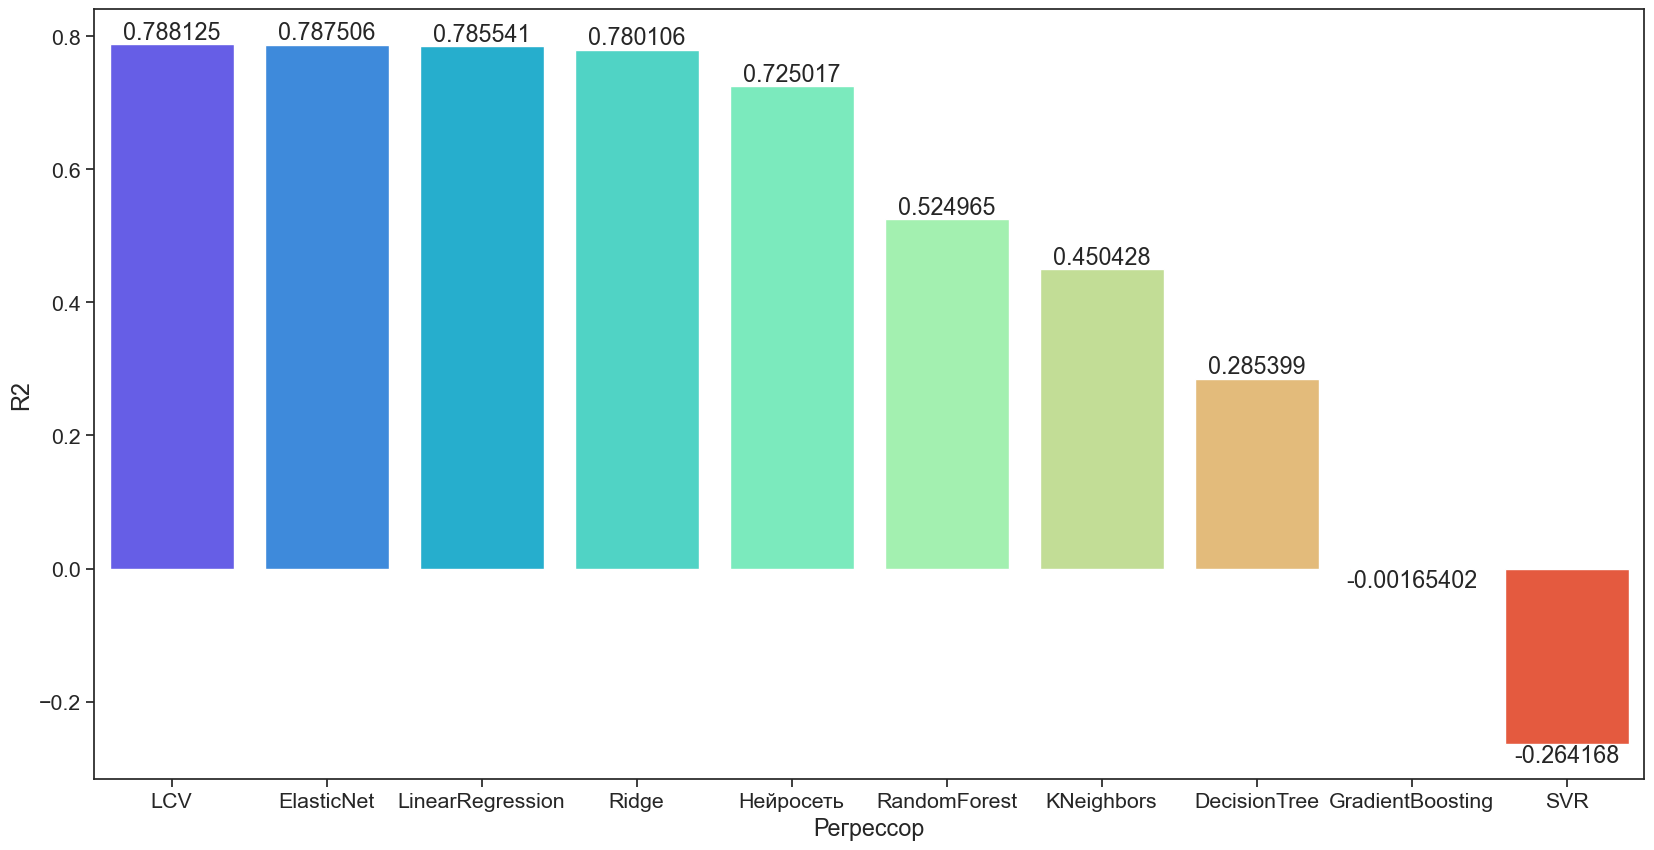

In [185]:
plt.figure(figsize = (20, 10))
ax = sns.barplot(data=df_r2_va, x=df_r2_va['Регрессор'], y=df_r2_va['R2'], palette='rainbow', order=df_r2_va.sort_values('R2',ascending = False).Регрессор)
for i in ax.containers:
    ax.bar_label(i,)

In [186]:
model_va = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', LinearRegression())])
model_va.fit(X_train_va.values, y_train_va.iloc[:, 0].values) #добавляем .values для сохранения модели

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', LinearRegression())])

In [188]:
model_va_before = model_va.predict(X_test_va)
model_va_before[0]

0.025670357870284877

In [ ]:
Разбиение на обучающую и тестовую выборки для прогноза соотношения матрица-наполнитель (mn)

In [14]:
X_mn = df_norm_n.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df_norm_n[['Соотношение матрица-наполнитель']]
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X_mn, y_mn, test_size=0.3, random_state=1)

NameError: name 'df_norm_n' is not defined

In [15]:
y_train_mn.shape[1]

NameError: name 'y_train_mn' is not defined

In [226]:
lr.fit(X_train_mn, y_train_mn.iloc[:, 0])
lr_pred_mn = lr.predict(X_test_mn)
lr_mae_mn = mean_absolute_error(lr_pred_mn, y_test_mn)
lr_mse_mn = mean_squared_error(y_test_mn, lr_pred_mn)
lr_r2_train_mn = lr.score(X_train_mn, y_train_mn)
lr_r2_mn = r2_score(y_test_mn, lr_pred_mn)
print('LinearRegression Results')
print(f'mae: {lr_mae_mn.round(3)}')
print(f'mse: {lr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {lr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {lr_r2_mn.round(3)}')

LinearRegression Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 0.095
R2 на тестовой выборке: 0.087


In [227]:
LCV.fit(X_train_mn, y_train_mn.iloc[:, 0])
LCV_pred_mn = LCV.predict(X_test_mn)
LCV_mae_mn = mean_absolute_error(LCV_pred_mn, y_test_mn)
LCV_mse_mn = mean_squared_error(y_test_mn, LCV_pred_mn)
LCV_r2_train_mn = LCV.score(X_train_mn, y_train_mn)
LCV_r2_mn = r2_score(y_test_mn, LCV_pred_mn)
print('LassoCV Results')
print(f'mae: {LCV_mae_mn.round(3)}')
print(f'mse: {LCV_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {LCV_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {LCV_r2_mn.round(3)}')

LassoCV Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 0.078
R2 на тестовой выборке: 0.082


In [228]:
ridge.fit(X_train_mn, y_train_mn.iloc[:, 0])
ridge_pred_mn = ridge.predict(X_test_mn)
ridge_mae_mn = mean_absolute_error(ridge_pred_mn, y_test_mn)
ridge_mse_mn = mean_squared_error(y_test_mn, ridge_pred_mn)
ridge_r2_train_mn = ridge.score(X_train_mn, y_train_mn)
ridge_r2_mn = r2_score(y_test_mn, ridge_pred_mn)
print('RidgeCV Results')
print(f'mae: {ridge_mae_mn.round(3)}')
print(f'mse: {ridge_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {ridge_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {ridge_r2_mn.round(3)}')

RidgeCV Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 0.078
R2 на тестовой выборке: 0.08


In [229]:
elastic.fit(X_train_mn, y_train_mn.iloc[:, 0])
elastic_pred_mn = elastic.predict(X_test_mn)
elastic_mae_mn = mean_absolute_error(elastic_pred_mn, y_test_mn)
elastic_mse_mn = mean_squared_error(y_test_mn, elastic_pred_mn)
elastic_r2_train_mn = elastic.score(X_train_mn, y_train_mn)
elastic_r2_mn = r2_score(y_test_mn, elastic_pred_mn)
print('ElasticNet Results')
print(f'mae: {elastic_mae_mn.round(3)}')
print(f'mse: {elastic_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {elastic_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {elastic_r2_mn.round(3)}')

ElasticNet Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 0.078
R2 на тестовой выборке: 0.082


In [230]:
rfr_gs_mn = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=9, n_jobs=-1, verbose=1)
rfr_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {rfr_gs_mn.best_params_}")

Fitting 9 folds for each of 36 candidates, totalling 324 fits
Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {'criterion': 'friedman_mse', 'max_depth': 1, 'n_estimators': 1}


In [231]:
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=1, max_depth=1)
rfr.fit(X_train_mn, y_train_mn.iloc[:, 0])
rfr_pred_mn = rfr.predict(X_test_mn)
rfr_mae_mn = mean_absolute_error(rfr_pred_mn, y_test_mn)
rfr_mse_mn = mean_squared_error(y_test_mn, rfr_pred_mn)
rfr_r2_train_mn = rfr.score(X_train_mn, y_train_mn)
rfr_r2_mn = r2_score(y_test_mn, rfr_pred_mn)
print('RandomForestRegressor Results')
print(f'mae: {rfr_mae_mn.round(3)}')
print(f'mse: {rfr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {rfr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {rfr_r2_mn.round(3)}')

RandomForestRegressor Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 0.059
R2 на тестовой выборке: 0.048


In [232]:
knn_gs_mn = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=9, n_jobs=-1, verbose=1)
knn_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {knn_gs_mn.best_params_}")

Fitting 9 folds for each of 30 candidates, totalling 270 fits
Лучшие параметры для предсказания признака 'Соотношение матрица-наполнитель' {'n_neighbors': 30}


In [233]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_mn, y_train_mn.iloc[:, 0])
knn_pred_mn = knn.predict(X_test_mn)
knn_mae_mn = mean_absolute_error(knn_pred_mn, y_test_mn)
knn_mse_mn = mean_squared_error(y_test_mn, knn_pred_mn)
knn_r2_train_mn = knn.score(X_train_mn, y_train_mn)
knn_r2_mn = r2_score(y_test_mn, knn_pred_mn)
print('KNeighborsRegressor Results')
print(f'mae: {knn_mae_mn.round(3)}')
print(f'mse: {knn_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {knn_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {knn_r2_mn.round(3)}')

KNeighborsRegressor Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 1.0
R2 на тестовой выборке: -0.779


In [234]:
svr_gs_mn = GridSearchCV(SVR(), svr_param_grid, cv=9, n_jobs=-1, verbose=1)
svr_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {svr_gs_mn.best_params_}")

Fitting 9 folds for each of 40 candidates, totalling 360 fits
Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {'C': 1e-08, 'kernel': 'linear'}


In [235]:
svr = SVR(C=1e-08, kernel='linear')
svr.fit(X_train_mn, y_train_mn.iloc[:, 0])
svr_pred_mn = svr.predict(X_test_mn)
svr_mae_mn = mean_absolute_error(svr_pred_mn, y_test_mn)
svr_mse_mn = mean_squared_error(y_test_mn, svr_pred_mn)
svr_r2_train_mn = svr.score(X_train_mn, y_train_mn)
svr_r2_mn = r2_score(y_test_mn, svr_pred_mn)
print('SVR Results')
print(f'mae: {svr_mae_mn.round(3)}')
print(f'mse: {svr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {svr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {svr_r2_mn.round(3)}')

SVR Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: -0.036
R2 на тестовой выборке: -0.042


In [236]:
gb_gs_mn = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=9, n_jobs=-1, verbose=1)
gb_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {gb_gs_mn.best_params_}")

Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {'loss': 'squared_error', 'max_depth': 2, 'max_features': 10, 'n_estimators': 10}


In [237]:
gb = GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1)
gb.fit(X_train_mn, y_train_mn.iloc[:, 0])
gb_pred_mn = gb.predict(X_test_mn)
gb_mae_mn = mean_absolute_error(gb_pred_mn, y_test_mn)
gb_mse_mn = mean_squared_error(y_test_mn, gb_pred_mn)
gb_r2_train_mn = gb.score(X_train_mn, y_train_mn)
gb_r2_mn = r2_score(y_test_mn, gb_pred_mn)
print('GradientBoostingRegressor Results')
print(f'mae: {gb_mae_mn.round(3)}')
print(f'mse: {gb_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {gb_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {gb_r2_mn.round(3)}')

GradientBoostingRegressor Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 0.005
R2 на тестовой выборке: 0.003


In [13]:
dtr_gs_mn = GridSearchCV(DecisionTreeRegressor(), dtr_param_grid, cv=9, n_jobs=-1, verbose=1)
dtr_gs_mn.fit(X_train_mn, y_train_mn.iloc[:, 0])
print(f"Лучшие параметры для предсказания признака 'Прочность при растяжении, МПа' {dtr_gs_mn.best_params_}")

NameError: name 'dtr_param_grid' is not defined

In [239]:
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=1, max_features=1, splitter='best')
dtr.fit(X_train_mn, y_train_mn.iloc[:, 0])
dtr_pred_mn = dtr.predict(X_test_mn)
dtr_mae_mn = mean_absolute_error(dtr_pred_mn, y_test_mn)
dtr_mse_mn = mean_squared_error(y_test_mn, dtr_pred_mn)
dtr_r2_train_mn = dtr.score(X_train_mn, y_train_mn)
dtr_r2_mn = r2_score(y_test_mn, dtr_pred_mn)
print('DecisionTreeRegressor Results')
print(f'mae: {dtr_mae_mn.round(3)}')
print(f'mse: {dtr_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {dtr_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {dtr_r2_mn.round(3)}')

DecisionTreeRegressor Results
mae: 0.0
mse: 0.0
R2 на тренировочной выборке: 0.05
R2 на тестовой выборке: 0.046


In [11]:
net_mn = Sequential()
net_mn.add(Dense(128, input_dim=X_train_mn.shape[1], activation='relu'))
net_mn.add(Dense(8, activation='relu'))
net_mn.add(Dense(8, activation='relu'))
net_mn.add(Dense(1, activation='linear')) #выходной слой с одним линейным нейроном для решения задачи регресси

NameError: name 'X_train_mn' is not defined

In [12]:
print(net_mn.summary()) #архитектура нашей модели

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [242]:
net_mn.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

In [243]:
#обучаем модель для предсказания признака "Соотношение матрица-наполнитель"
history_mn = net_mn.fit(X_train_mn, y_train_mn.iloc[:, 0], epochs=100, validation_split=0.1, verbose=1)
#рассчитаем коэффицент детерминации искуственной нейронной сети для признака "Соотношение матрица-наполнитель"
print(f'Коэффициент детерминации для признака "{y_train_mn.columns[0]}": {r2_score(y_test_mn.iloc[:, 0], (net_mn.predict(X_test_mn)))}')

Epoch 1/100
19/19 [==============================] - 3s 27ms/step - loss: 1.3442e-05 - mae: 0.0027 - val_loss: 4.6704e-06 - val_mae: 0.0019
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 1.9941e-06 - mae: 0.0012 - val_loss: 1.4207e-06 - val_mae: 8.8830e-04
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 6.0903e-07 - mae: 6.0004e-04 - val_loss: 5.0593e-07 - val_mae: 5.4714e-04
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 3.3007e-07 - mae: 4.4976e-04 - val_loss: 3.4234e-07 - val_mae: 4.7266e-04
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 2.5403e-07 - mae: 3.9185e-04 - val_loss: 3.0958e-07 - val_mae: 4.2451e-04
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 2.3515e-07 - mae: 3.7378e-04 - val_loss: 2.9350e-07 - val_mae: 4.0402e-04
Epoch 7/100
19/19 [==============================] - 0s 9ms/step - loss: 2.3329e-07 - mae: 3.7619e-04 - val_loss: 3.0683e-07 

In [244]:
net_pred_mn = net_mn.predict(X_test_mn)
net_mae_mn = mean_absolute_error(net_pred_mn, y_test_mn)
net_mse_mn = mean_squared_error(y_test_mn, net_pred_mn)
net_r2_train_mn = r2_score(y_train_mn, net_mn.predict(X_train_mn))
net_r2_mn = r2_score(y_test_mn, net_pred_mn)
print('net Results')
print(f'mae: {net_mae_mn.round(3)}')
print(f'mse: {net_mse_mn.round(3)}')
print(f'R2 на тренировочной выборке: {net_r2_train_mn.round(3)}')
print(f'R2 на тестовой выборке: {net_r2_mn.round(3)}')

21/21 [==============================] - 0s 4ms/step
net Results
mae: 0.001
mse: 0.0
R2 на тренировочной выборке: -5.64
R2 на тестовой выборке: -5.287


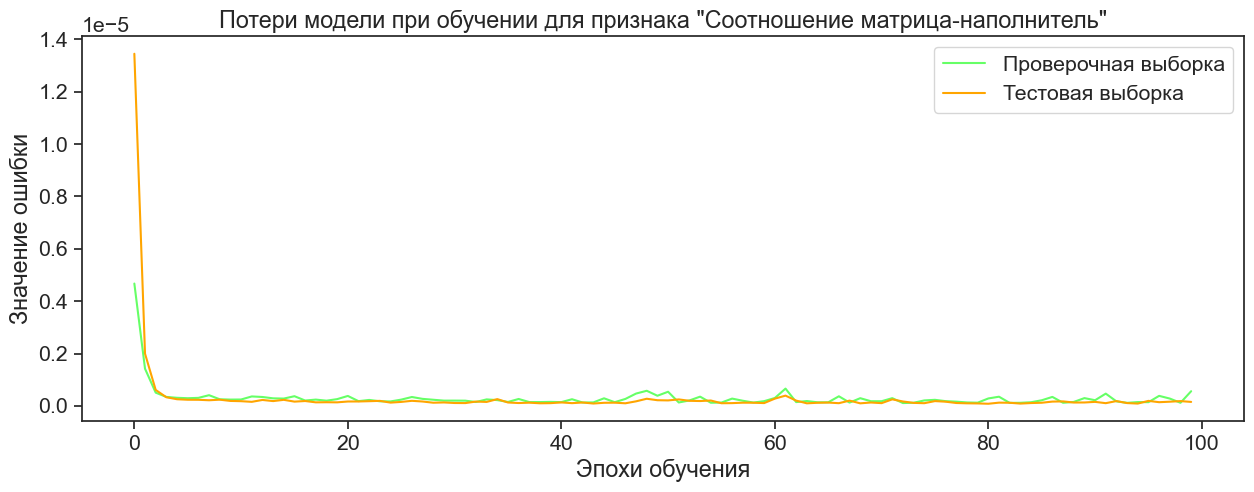

In [245]:
#визуализируем график потерь модели при обучении
plt.figure(figsize = (15, 5))
sns.set(font_scale=1.4, style='ticks')
plt.plot(history_mn.history['val_loss'], color='lime', alpha=0.6)
plt.plot(history_mn.history['loss'], color='orange')
plt.title('Потери модели при обучении для признака "Соотношение матрица-наполнитель"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Проверочная выборка', 'Тестовая выборка'])
plt.show()

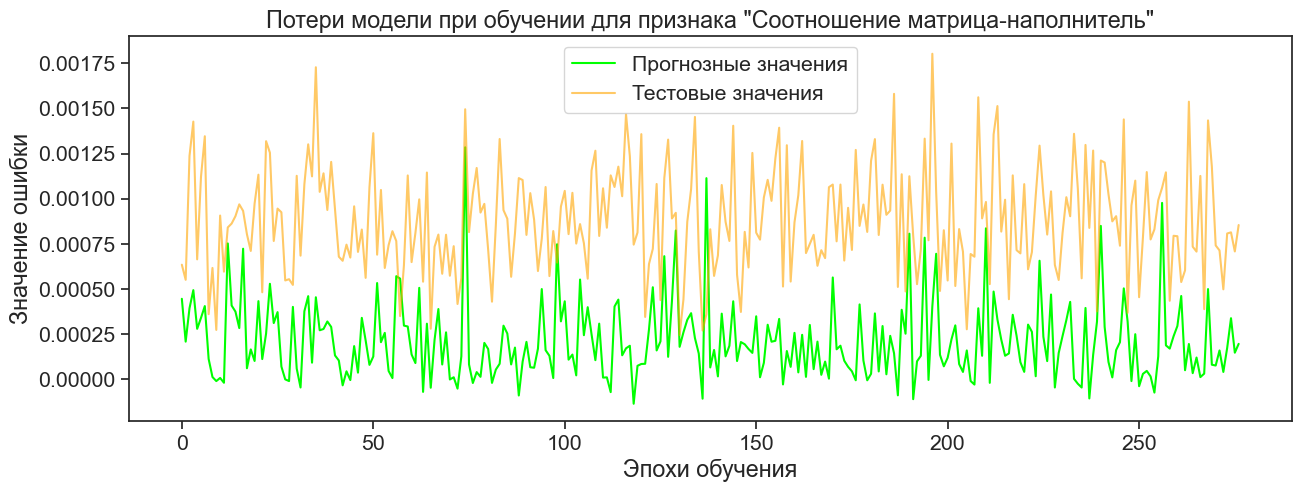

In [246]:
#визуализириуем качество обобщения искусственной нейронной сети на тестовых данных
plt.figure(figsize = (15, 5))
plt.plot(net_pred_mn, label='Прогнозные значения', color='lime')
plt.plot(y_test_mn.iloc[:, 0].values, label='Тестовые значения',  alpha=0.6, color='orange')
plt.title('Потери модели при обучении для признака "Соотношение матрица-наполнитель"')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи обучения')
plt.legend(['Прогнозные значения', 'Тестовые значения'])
plt.show()

In [247]:
#сравним результаты работы всех 10 моделей, прогнозирующих признак "Соотношение матрица-наполнитель"
df_r2_mn = {'Регрессор':['LinearRegression', 'LCV', 'Ridge', 'ElasticNet', 'RandomForest', 'KNeighbors', 'SVR', 'GradientBoosting', 'DecisionTree', 'Нейросеть'],
                'MAE':[lr_mae_mn, LCV_mae_mn, ridge_mae_mn, elastic_mae_mn, rfr_mae_mn, knn_mae_mn, svr_mae_mn, gb_mae_mn, dtr_mae_mn, net_mae_mn],
                'MSE':[lr_mse_mn, LCV_mae_mn, ridge_mae_mn, elastic_mae_mn, rfr_mae_mn, knn_mae_mn, svr_mae_mn, gb_mae_mn, dtr_mae_mn, net_mse_mn],
                'R2_train':[lr_r2_train_mn, LCV_r2_train_mn, ridge_r2_train_mn, elastic_r2_train_mn, rfr_r2_train_mn, knn_r2_train_mn, svr_r2_train_mn, gb_r2_train_mn, dtr_r2_train_mn, net_r2_train_mn],
                'R2':[lr_r2_mn, LCV_r2_mn, ridge_r2_mn, elastic_r2_mn, rfr_r2_mn, knn_r2_mn, svr_r2_mn, gb_r2_mn, dtr_r2_mn, net_r2_mn]} 
df_r2_mn = pd.DataFrame(df_r2_mn)
df_r2_mn.sort_values(['R2'], ascending=False)

Регрессор       MAE           MSE  R2_train        R2
0  LinearRegression  0.000227  7.915982e-08  0.095232  0.087167
1               LCV  0.000227  2.273706e-04  0.077830  0.081554
3        ElasticNet  0.000227  2.273715e-04  0.077829  0.081551
2             Ridge  0.000228  2.279428e-04  0.078328  0.079977
4      RandomForest  0.000228  2.280757e-04  0.058861  0.047916
8      DecisionTree  0.000232  2.320732e-04  0.050371  0.045831
7  GradientBoosting  0.000239  2.391646e-04  0.004764  0.003418
6               SVR  0.000248  2.477001e-04 -0.035790 -0.041530
5        KNeighbors  0.000322  3.216846e-04  1.000000 -0.779003
9         Нейросеть  0.000677  5.452006e-07 -5.639788 -5.286991

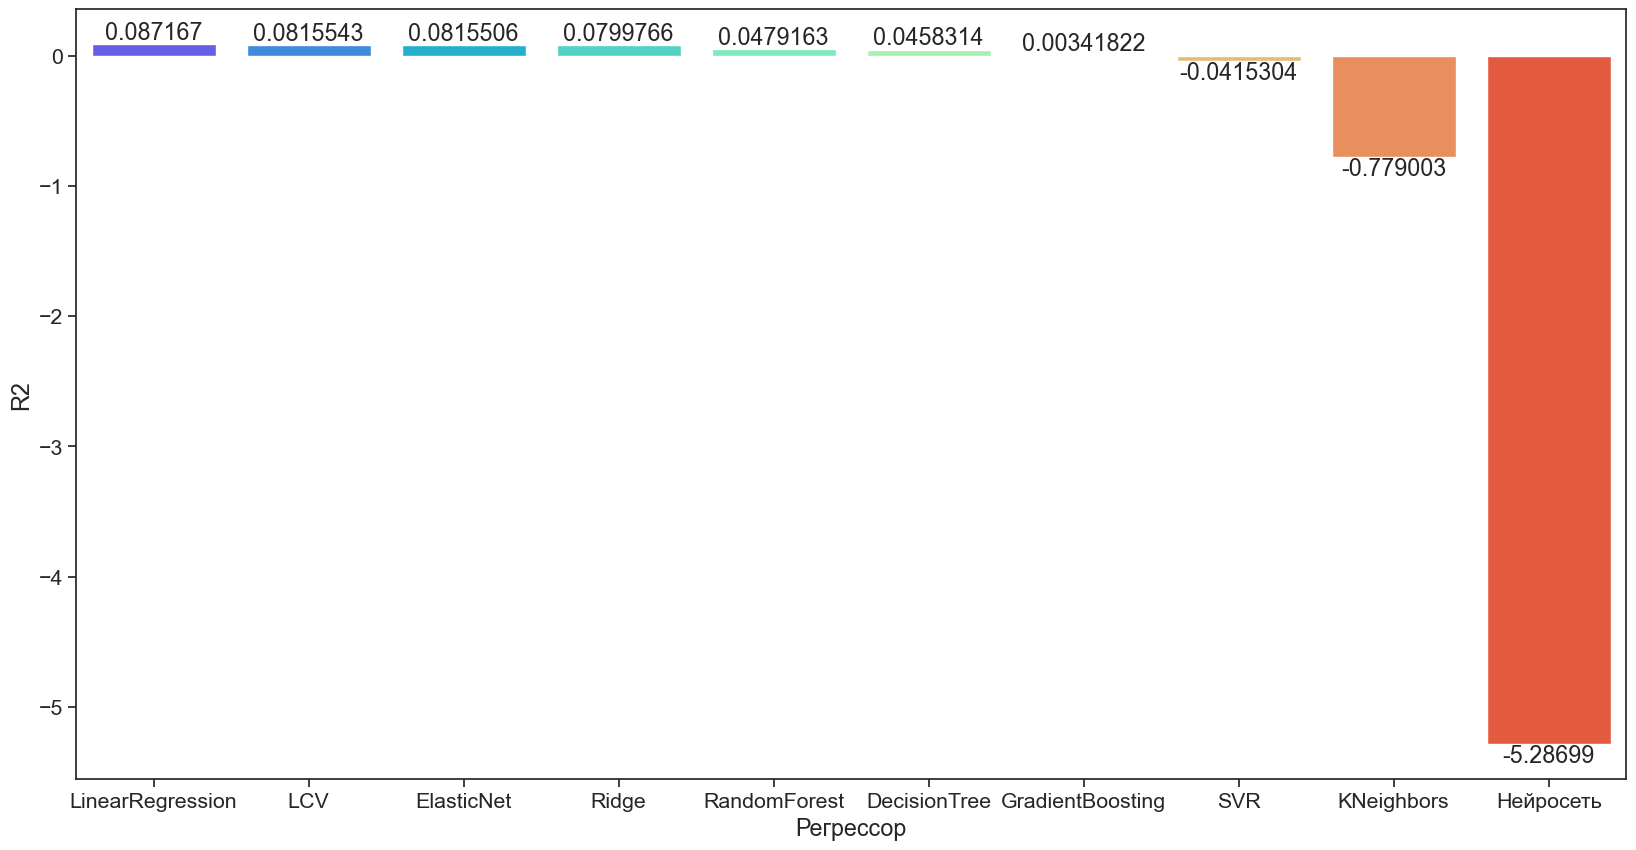

In [248]:
plt.figure(figsize = (20, 10))
ax = sns.barplot(data=df_r2_mn, x=df_r2_mn['Регрессор'], y=df_r2_mn['R2'], palette='rainbow', order=df_r2_mn.sort_values('R2',ascending = False).Регрессор)
for i in ax.containers:
    ax.bar_label(i,)

In [249]:
#с набором параметров для предсказания признака "Соотношение матрица-наполнитель"
best_model_mn = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=1))])
best_model_mn.fit(X_train_mn.values, y_train_mn.iloc[:, 0].values) #добавляем .values для сохранения модели

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=1, max_features=1,
                                           n_estimators=1))])

In [250]:
#проверяем работоспособность модели
best_model_mn_before = best_model_mn.predict(X_test_mn)
best_model_mn_before[0]

0.0008986974007109627

In [4]:
net_mn.save('net_mn')


NameError: name 'net_mn' is not defined

# На данном этапе вкр можно завершить. Датасет мы очистили, и даже на таком маленьком датасете нам удалось выполнить поставленную задачу. 